# Jewellery dataset analysis

## Problem statement:

#### 1) What are the items to buy in this season to get maximum profit ?
#### 2) How to reduce the dead stock?

The dataset provided was the jewellery dataset, with multiple tables in an access file. From this access file, two tables were taken namely 'M-jewel' and 'T_FJewel'. From these two tables we take the necessary columns needed for our analysis.

## Importing the packages

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns

### Importing the excel file and inserting it into a python dataframe

In [2]:
df=pd.read_excel('jewellery_revised2.xlsx')

#### Dataset preview

In [3]:
df.head(5)

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,Expr1008,...,UserId,DISCOUNTSALE,UnitID,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,JwlDesc
0,Silver,Silver,NaN,1A,S,SL,Silver articles,135845,0,NaN,...,MR,N,C,1,NaN,2014-02-12,2656,2560.0,NaN,One plate
1,Silver,Silver,NaN,1A,S,SL,Silver articles,135853,0,NaN,...,MR,N,C,1,NaN,NaT,1855,1750.0,NaN,One plate
2,Silver,Silver,NaN,1A,S,SL,Silver articles,135932,0,NaN,...,SIVA,N,C,1,NaN,2016-08-19,9821,8855.0,NaN,One kuthu villaku
3,Silver,Silver,NaN,1A,S,SL,Silver articles,135946,0,NaN,...,MR,N,C,1,NaN,NaT,7420,7000.0,NaN,One plate
4,Silver,Silver,NaN,1A,S,SL,Silver articles,135947,0,NaN,...,MR,N,C,1,NaN,NaT,7420,7000.0,NaN,One plate


In [4]:
df.columns

Index(['Department', 'JewelGroup', 'JewelGroup_Sub', 'JewelType', 'Metal',
       'MetalType', 'JewelDesc', 'JewelNo', 'JewelSlNo', 'Expr1008',
       'JewelDate', 'Expr1010', 'Expr1011', 'MCType', 'Expr1013', 'MC',
       'Expr1015', 'Expr1016', 'Expr1017', 'Profit', 'Expr1019', 'UserId',
       'DISCOUNTSALE', 'UnitID', 'JwlPcs', 'CollectionID', 'InvoiceDate',
       'JwlCost', 'CP_JwlCost', 'DesignID', 'JwlDesc'],
      dtype='object')

#### Taking only the necessary columns into consideration for the analysis

In [3]:
df1=df[['Department', 'JewelGroup', 'JewelGroup_Sub', 'JewelType', 'Metal',
       'MetalType', 'JewelDesc', 'JewelNo', 'JewelSlNo',
       'JewelDate', 'MCType', 'MC',
      'UserId','JwlDesc',
       'DISCOUNTSALE', 'UnitID', 'JwlPcs', 'CollectionID', 'InvoiceDate',
       'JwlCost', 'CP_JwlCost', 'DesignID']]

In [4]:
df1.head(5)

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,UserId,JwlDesc,DISCOUNTSALE,UnitID,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID
0,Silver,Silver,NaN,1A,S,SL,Silver articles,135845,0,2008-03-31,...,MR,One plate,N,C,1,NaN,2014-02-12,2656,2560.0,NaN
1,Silver,Silver,NaN,1A,S,SL,Silver articles,135853,0,2008-03-31,...,MR,One plate,N,C,1,NaN,NaT,1855,1750.0,NaN
2,Silver,Silver,NaN,1A,S,SL,Silver articles,135932,0,2008-03-31,...,SIVA,One kuthu villaku,N,C,1,NaN,2016-08-19,9821,8855.0,NaN
3,Silver,Silver,NaN,1A,S,SL,Silver articles,135946,0,2008-03-31,...,MR,One plate,N,C,1,NaN,NaT,7420,7000.0,NaN
4,Silver,Silver,NaN,1A,S,SL,Silver articles,135947,0,2008-03-31,...,MR,One plate,N,C,1,NaN,NaT,7420,7000.0,NaN


#### General dataset description 

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
JewelNo,23520.0,141271.073810,7369.881259,135791.0,137478.75,140896.0,144520.25,1072790.0
JewelSlNo,23520.0,0.003359,0.062793,0.0,0.00,0.0,0.00,3.0
MC,23520.0,8143.131590,14178.315503,0.0,719.00,3071.5,9990.00,328840.0
JwlPcs,23520.0,1.373682,1.202714,0.0,1.00,1.0,2.00,85.0
JwlCost,23520.0,81286.275298,211400.878513,108.0,6548.00,25194.5,87436.50,16140093.0
CP_JwlCost,23520.0,71554.004609,180791.299804,0.0,5667.50,21568.5,69949.20,11272798.0


## Checking for null values

In [6]:
df1.isna().sum()

Department            0
JewelGroup            0
JewelGroup_Sub    11926
JewelType             0
Metal               275
MetalType             0
JewelDesc             0
JewelNo               0
JewelSlNo             0
JewelDate             0
MCType                0
MC                    0
UserId                0
JwlDesc               0
DISCOUNTSALE          0
UnitID                0
JwlPcs                0
CollectionID      22026
InvoiceDate        5255
JwlCost               0
CP_JwlCost            0
DesignID          22070
dtype: int64

In [7]:
df1.dtypes

Department                object
JewelGroup                object
JewelGroup_Sub            object
JewelType                 object
Metal                     object
MetalType                 object
JewelDesc                 object
JewelNo                    int64
JewelSlNo                  int64
JewelDate         datetime64[ns]
MCType                    object
MC                         int64
UserId                    object
JwlDesc                   object
DISCOUNTSALE              object
UnitID                    object
JwlPcs                     int64
CollectionID              object
InvoiceDate       datetime64[ns]
JwlCost                    int64
CP_JwlCost               float64
DesignID                  object
dtype: object

#### Checking the unique values in each column

In [8]:
df1['JewelType'].unique()

array(['1A', '1C', '1K', '1M', '1N', '1O', '1S', '1T', 'AD', 'FJ', 'J_0',
       'J_1', 'J_3', 'J_4', 'J_5', 'J_B', 'J_C', 'J_E', 'J_G', 'J_k',
       'J_M', 'J_N', 'J_P', 'J_R', 'J_T', 'J_X', 'JA', 'JB', 'JK', 'JK1',
       'JK2', 'JK3', 'JK4', 'JK5', 'JK6', 'JK7', 'JN1', 'JN3', 'JN4',
       'JN5', 'JN7', 'JN9', 'JR', 'JS', 'JX', 'JY', 'KR1', 'PC', 'PE',
       'PO', 'PP', 'PR', 'RO', 'SSJ'], dtype=object)

In [11]:
df1['JewelNo'].nunique()

13237

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23520 entries, 0 to 23519
Data columns (total 22 columns):
Department        23520 non-null object
JewelGroup        23520 non-null object
JewelGroup_Sub    11594 non-null object
JewelType         23520 non-null object
Metal             23245 non-null object
MetalType         23520 non-null object
JewelDesc         23520 non-null object
JewelNo           23520 non-null int64
JewelSlNo         23520 non-null int64
JewelDate         23520 non-null datetime64[ns]
MCType            23520 non-null object
MC                23520 non-null int64
UserId            23520 non-null object
JwlDesc           23520 non-null object
DISCOUNTSALE      23520 non-null object
UnitID            23520 non-null object
JwlPcs            23520 non-null int64
CollectionID      1494 non-null object
InvoiceDate       18265 non-null datetime64[ns]
JwlCost           23520 non-null int64
CP_JwlCost        23520 non-null float64
DesignID          1450 non-null object
d

In [13]:
df1.shape

(23520, 22)

In [14]:
df1['JewelGroup_Sub'].unique()

array([nan, 'Chombu', 'Chandan Cub', 'Kumkum Box', 'Deepam', 'Aarthi',
       'Pancha Patram', 'Plate', 'Boxes', 'Bowl', 'Bell', 'Coin', 'Jadi',
       'Udrani', 'Photo Frame', 'Tumbler', 'Agarpathi Stand', 'Tea set',
       'Kuthu Villaku', 'Lamp', 'Katora', 'Rattle', 'Ghee Pot', 'Spoon',
       'Toe rings', 'Idol', 'Jug', 'Leg Chains', 'Paladai', 'Bar', 'Fork',
       'Cufflinks', 'Peg Measure', 'Book Mark', 'Ring', 'Pendant',
       'Trophy', 'Key Chain', 'Kuthuvillaku', 'Mala', 'Chain',
       'Nose screw', 'Earring', 'Necklace', 'Bangles', 'Manglayam',
       'Bracelet', 'Studs', 'Hook Drops', 'Navarathana', 'Jumkhi',
       'Eardrops', 'Colours', 'Recollection', 'Mattal', 'Long Earring',
       'Light Weight', 'Nakas', 'Vali', 'Tikka', 'Bridal', 'Earrings',
       'Bangle', 'Mangalyam', 'Kumkum box', 'Vanki', 'Oddiyanam',
       'Evening Wear', 'Timeless', 'Straight Line', 'Working Women',
       'Raasi Bangle', 'Cocktail', 'Solitaire', 'Raasi Thodu',
       'Ear Drops', 'Jumkha'

In [15]:
df1['JwlPcs'].unique()

array([ 1,  3,  2,  5,  4,  8,  6,  9, 15, 65,  7, 48, 20, 30, 40, 25, 35,
       85, 12, 26, 10, 11, 19,  0], dtype=int64)

In [16]:
df1['JewelDesc'].unique()

array(['Silver articles', 'Silver Jewel Ornaments', 'Fancy Jewels',
       'Jewel', 'One pair earrings', 'One coin', '18 Kt Plain Gold Items',
       'Miscellaneous', 'One pair bangles', 'One chain', 'One nosering',
       'One necklace', 'One pendant', 'One ring', 'One bracelet',
       'Jadau necklace', 'Jadau Cufflinks', 'One nose screw',
       'Jadau Bangle', 'One Jadau ring', 'One Jadau pendant',
       'One pair Jadau Earring', 'Jadau necklace & earring',
       'Jewel (Repair)', 'Suspense Jewels - Summit'], dtype=object)

In [17]:
df1['JwlDesc'].unique()

array(['One plate', 'One kuthu villaku',
       'One plate with Engraving & Stand', ..., 'Ear vali',
       'One navaratana banlge', 'Ruby beads mala'], dtype=object)

In [18]:
df1['CollectionID'].unique()

array([nan, 'RAASI THODU', 'RECOLLECTION', 'JHUMKA COLLECTION', 'ANARA',
       'SYMPHONY', 'CHOLA COLLECTION', 'MENS COLLECTION',
       'GRADUATION COLLECTION', 'RAJAMMAL COLLECTION', 'FOREVERMARK',
       'RECOLLECTION WAX'], dtype=object)

In [19]:
df1['MCType'].unique()

array(['PG', 'LOT'], dtype=object)

In [20]:
df1['MC'].unique()

array([    96,    105,    966, ...,   3298,   5274, 129500], dtype=int64)

In [21]:
df1['UnitID'].unique()

array(['C', 'K'], dtype=object)

### Creating a unique ID for each piece of jewellery

In [9]:
#df1["unique_key"] = df1["JewelType"].map(str) + df1["JewelNo"]
df1["JewelNo"]=df1["JewelNo"].astype(str)
df1["unique_key"]  = df1[['JewelType', 'JewelNo']].apply(lambda x: ''.join(x), axis=1)

In [10]:
df1.head()

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,JwlDesc,DISCOUNTSALE,UnitID,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key
0,Silver,Silver,NaN,1A,S,SL,Silver articles,135845,0,2008-03-31,...,One plate,N,C,1,NaN,2014-02-12,2656,2560.0,NaN,1A135845
1,Silver,Silver,NaN,1A,S,SL,Silver articles,135853,0,2008-03-31,...,One plate,N,C,1,NaN,NaT,1855,1750.0,NaN,1A135853
2,Silver,Silver,NaN,1A,S,SL,Silver articles,135932,0,2008-03-31,...,One kuthu villaku,N,C,1,NaN,2016-08-19,9821,8855.0,NaN,1A135932
3,Silver,Silver,NaN,1A,S,SL,Silver articles,135946,0,2008-03-31,...,One plate,N,C,1,NaN,NaT,7420,7000.0,NaN,1A135946
4,Silver,Silver,NaN,1A,S,SL,Silver articles,135947,0,2008-03-31,...,One plate,N,C,1,NaN,NaT,7420,7000.0,NaN,1A135947


In [11]:
df1['unique_key'].nunique()

23467

In [12]:
df1["JewelSlNo"]=df1["JewelSlNo"].astype(str)
df1["unique_key_true"]  = df1[['unique_key', 'JewelSlNo']].apply(lambda x: ''.join(x), axis=1)

In [13]:
df1.head()

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,DISCOUNTSALE,UnitID,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key,unique_key_true
0,Silver,Silver,NaN,1A,S,SL,Silver articles,135845,0,2008-03-31,...,N,C,1,NaN,2014-02-12,2656,2560.0,NaN,1A135845,1A1358450
1,Silver,Silver,NaN,1A,S,SL,Silver articles,135853,0,2008-03-31,...,N,C,1,NaN,NaT,1855,1750.0,NaN,1A135853,1A1358530
2,Silver,Silver,NaN,1A,S,SL,Silver articles,135932,0,2008-03-31,...,N,C,1,NaN,2016-08-19,9821,8855.0,NaN,1A135932,1A1359320
3,Silver,Silver,NaN,1A,S,SL,Silver articles,135946,0,2008-03-31,...,N,C,1,NaN,NaT,7420,7000.0,NaN,1A135946,1A1359460
4,Silver,Silver,NaN,1A,S,SL,Silver articles,135947,0,2008-03-31,...,N,C,1,NaN,NaT,7420,7000.0,NaN,1A135947,1A1359470


#### Using this new unique key assigned to each individual jewellery piece, we get an index or an id for them, if we need to identify them later

In [14]:
df1['unique_key_true'].nunique()

23520

In [15]:
df1.drop('unique_key',1,inplace=True)

In [29]:
df1.to_excel('jewellery_revised.xlsx',sheet_name='Sheet1')

In [29]:
df1.head()

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,JwlDesc,DISCOUNTSALE,UnitID,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key_true
0,Silver,Silver,NaN,1A,S,SL,Silver articles,135845,0,2008-03-31,...,One plate,N,C,1,NaN,2014-02-12,2656,2560.0,NaN,1A1358450
1,Silver,Silver,NaN,1A,S,SL,Silver articles,135853,0,2008-03-31,...,One plate,N,C,1,NaN,NaT,1855,1750.0,NaN,1A1358530
2,Silver,Silver,NaN,1A,S,SL,Silver articles,135932,0,2008-03-31,...,One kuthu villaku,N,C,1,NaN,2016-08-19,9821,8855.0,NaN,1A1359320
3,Silver,Silver,NaN,1A,S,SL,Silver articles,135946,0,2008-03-31,...,One plate,N,C,1,NaN,NaT,7420,7000.0,NaN,1A1359460
4,Silver,Silver,NaN,1A,S,SL,Silver articles,135947,0,2008-03-31,...,One plate,N,C,1,NaN,NaT,7420,7000.0,NaN,1A1359470


#### General dataset description after cleaning

In [29]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
MC,23520.0,8143.131590,14178.315503,0.0,719.0,3071.5,9990.0,328840.0
JwlPcs,23520.0,1.373682,1.202714,0.0,1.0,1.0,2.0,85.0
JwlCost,23520.0,81286.275298,211400.878513,108.0,6548.0,25194.5,87436.5,16140093.0
CP_JwlCost,23520.0,71554.004609,180791.299804,0.0,5667.5,21568.5,69949.2,11272798.0


In [30]:
df1.shape

(23520, 23)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23520 entries, 0 to 23519
Data columns (total 23 columns):
Department         23520 non-null object
JewelGroup         23520 non-null object
JewelGroup_Sub     11594 non-null object
JewelType          23520 non-null object
Metal              23245 non-null object
MetalType          23520 non-null object
JewelDesc          23520 non-null object
JewelNo            23520 non-null object
JewelSlNo          23520 non-null object
JewelDate          23520 non-null datetime64[ns]
MCType             23520 non-null object
MC                 23520 non-null int64
UserId             23520 non-null object
JwlDesc            23520 non-null object
DISCOUNTSALE       23520 non-null object
UnitID             23520 non-null object
JwlPcs             23520 non-null int64
CollectionID       1494 non-null object
InvoiceDate        18265 non-null datetime64[ns]
JwlCost            23520 non-null int64
CP_JwlCost         23520 non-null float64
DesignID         

In [32]:
df1.head()

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,JwlDesc,DISCOUNTSALE,UnitID,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key_true
0,Silver,Silver,NaN,1A,S,SL,Silver articles,135845,0,2008-03-31,...,One plate,N,C,1,NaN,2014-02-12,2656,2560.0,NaN,1A1358450
1,Silver,Silver,NaN,1A,S,SL,Silver articles,135853,0,2008-03-31,...,One plate,N,C,1,NaN,NaT,1855,1750.0,NaN,1A1358530
2,Silver,Silver,NaN,1A,S,SL,Silver articles,135932,0,2008-03-31,...,One kuthu villaku,N,C,1,NaN,2016-08-19,9821,8855.0,NaN,1A1359320
3,Silver,Silver,NaN,1A,S,SL,Silver articles,135946,0,2008-03-31,...,One plate,N,C,1,NaN,NaT,7420,7000.0,NaN,1A1359460
4,Silver,Silver,NaN,1A,S,SL,Silver articles,135947,0,2008-03-31,...,One plate,N,C,1,NaN,NaT,7420,7000.0,NaN,1A1359470


### Importing the plotting libraries

In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib

%matplotlib inline

#### Percentage of jewellery coming from each Unit/Store

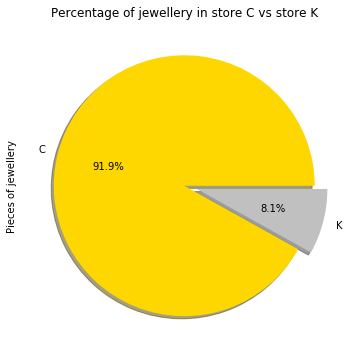

In [35]:
colors = ['gold','silver']
explode = (0, 0.1)

plt.figure(figsize=(12,6))
df1.groupby('UnitID')['JwlPcs'].sum().plot(kind='pie', explode= explode, colors=colors, autopct='%1.1f%%',shadow=True)
plt.title('Percentage of jewellery in store C vs store K')
plt.ylabel("Pieces of jewellery")
plt.show()

We see the distribution of jewellery coming from Unit C and K, the two branches of the main unit. Here we see that most of the jewellery (>90%) is coming from Unit C and only a handful from Unit K.

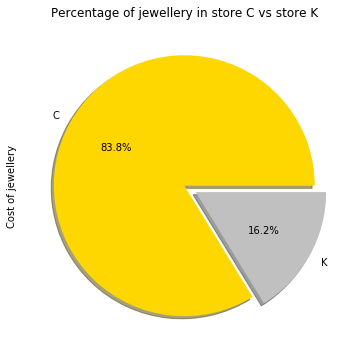

In [36]:
colors = ['gold','silver']
explode = (0, 0.1)

plt.figure(figsize=(12,6))
df1.groupby('UnitID')['JwlCost'].sum().plot(kind='pie', explode= explode, colors=colors, autopct='%1.1f%%',shadow=True)
plt.title('Percentage of jewellery in store C vs store K')
plt.ylabel("Cost of jewellery")
plt.show()

Unit C also accounts for the majority of the cost of the jewellery in the store as compared to Unit K, however the ratio is a bit less compared to the jewellery pieces difference ratio.

Cost of jewellery belonging to each collection and segregated into the two units from where they come from. Here we identify some of the outliers in the data. This dataset being a jewellery dataset contains a lot of outliers as the range of the prices of jewellery has a huge spread.

<Figure size 720x1440 with 0 Axes>

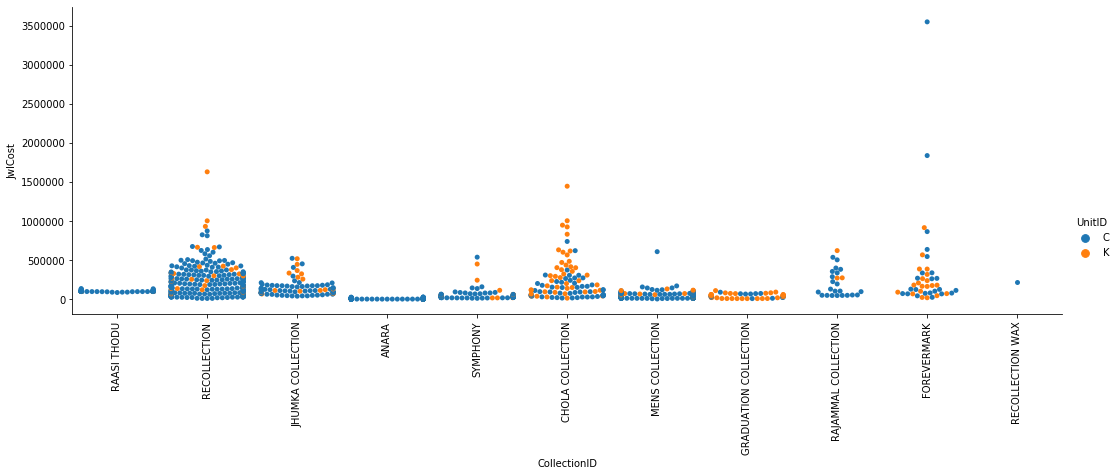

In [37]:
plt.figure(figsize=(10,20))
sns.catplot(x='CollectionID', y='JwlCost', hue='UnitID',kind='swarm',data=df1,aspect=3)
plt.xticks(rotation=90)
plt.show()

#### Grouping the Jewellery subgroups according to price

In [38]:
x=df1.groupby('JewelGroup_Sub')['JwlCost'].sum()
x

JewelGroup_Sub
Aarthi                   45812
Addigai               19255616
Agarpathi Stand          25266
Alphabet Locket          75188
Band                    155734
Bangle                  384213
Bangles               54895152
Bar                     150034
Bell                     95590
Birthstone Ring        2942592
Blue & Green           1102843
Book Mark                 2700
Bowl                   1793609
Boxes                    96821
Bracelet              22878671
Bridal               129221926
Canary Collection      6224217
Chain                 80512036
Chain pendant          2362905
Chandan Cub              83924
Charm                    53934
Choker                 1757116
Chombu                  165820
Cocktail               5116392
Coin                  23100326
Colour Stone           8017628
Colours               25537562
Cufflinks              1216736
Deepam                  612973
Ear Drops             19202486
                       ...    
Raasi Bangle            

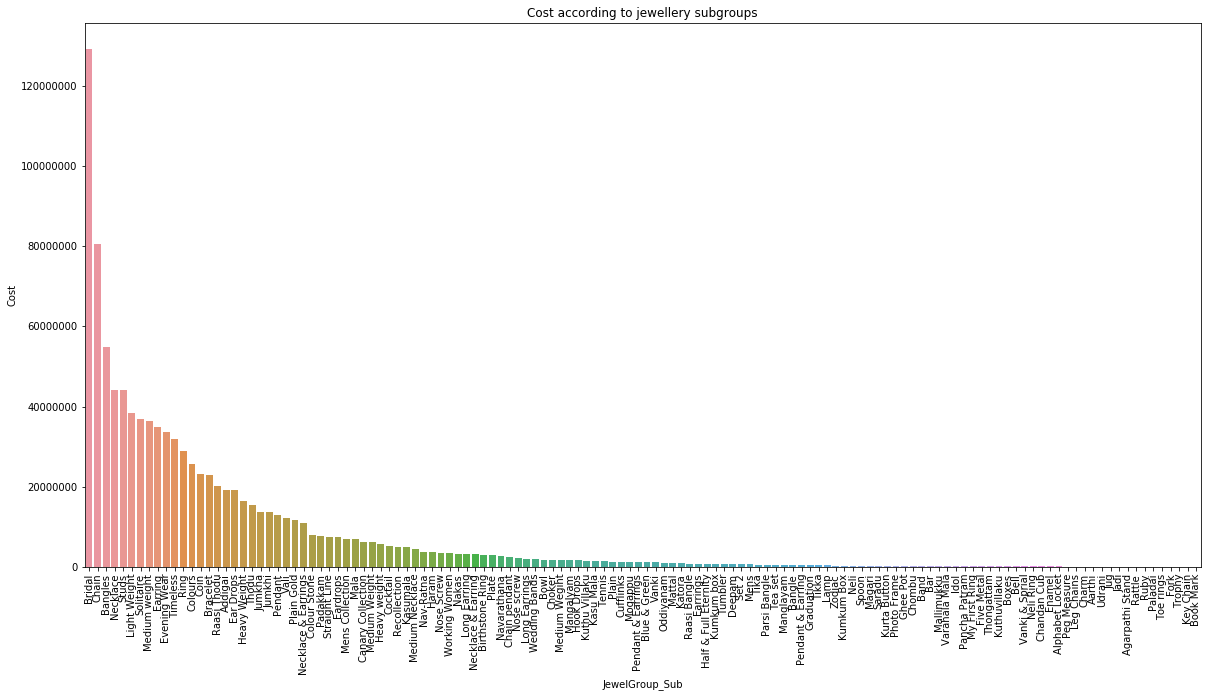

In [39]:
plt.figure(figsize=(20,10))
x1=df1.groupby('JewelGroup_Sub')['JwlCost'].sum().sort_values(ascending=False)
sns.barplot(x1.index,x1,orient='v')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.ylabel("Cost")
plt.title("Cost according to jewellery subgroups")
plt.show()

We see the cumulative cost of the Bridal collection is quite high, followed by Chain, bangles, etc. These are the subgroups that are worth a lot of money in the shops.

#### Grouping the Jewellery subgroups according to quantity

In [40]:
y=df1.groupby('JewelGroup_Sub')['JwlPcs'].sum()
y

JewelGroup_Sub
Aarthi                  6
Addigai                49
Agarpathi Stand         4
Alphabet Locket         9
Band                    4
Bangle                106
Bangles               450
Bar                     3
Bell                   12
Birthstone Ring        97
Blue & Green            8
Book Mark               1
Bowl                  358
Boxes                  11
Bracelet              217
Bridal                264
Canary Collection      39
Chain                1516
Chain pendant          10
Chandan Cub            24
Charm                   1
Choker                  6
Chombu                 13
Cocktail               35
Coin                 1750
Colour Stone          110
Colours               378
Cufflinks              53
Deepam                227
Ear Drops             259
                     ... 
Raasi Bangle            2
Raasi Thodu           359
Rattle                  9
Recollection           28
Ring                  453
Ruby                    1
Saradu                 

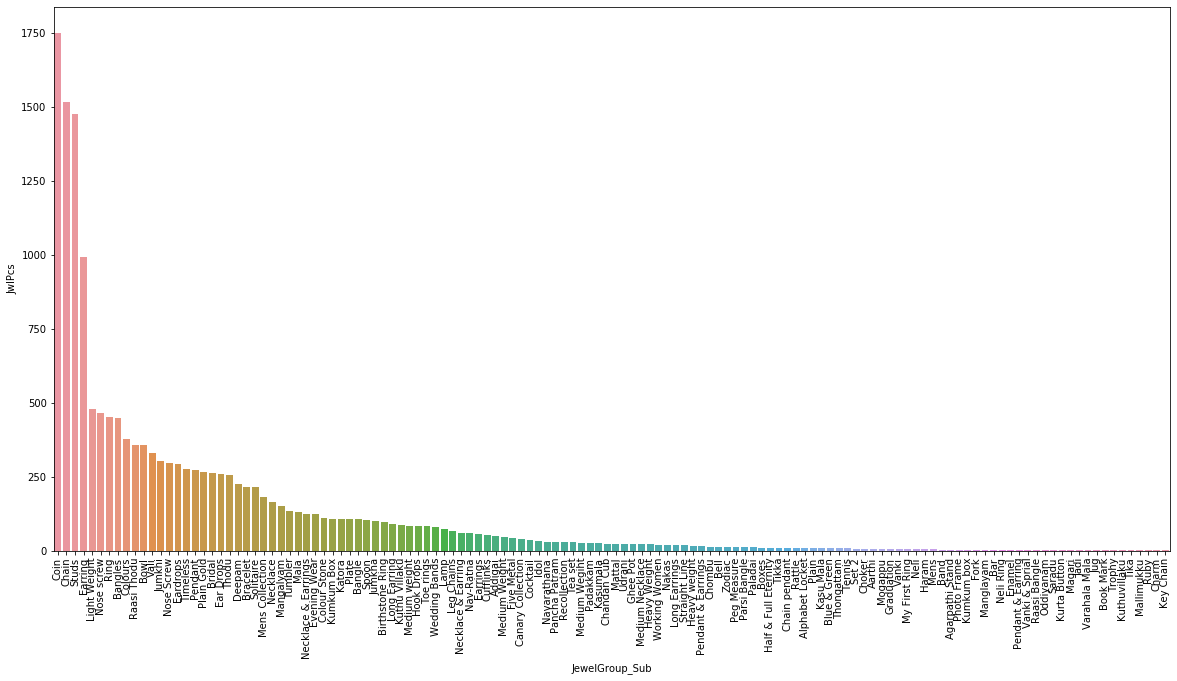

In [41]:
plt.figure(figsize=(20,10))
x1=df1.groupby('JewelGroup_Sub')['JwlPcs'].sum().sort_values(ascending=False)
sns.barplot(x1.index,x1)
plt.xticks(rotation=90)
plt.show()

Here we group the jewellery subgroups according to the quantity of jewellery pieces in each subgroup. We can see that most of the jewellery in both the units consists of coins by a huge margin, followed by Chain, studs and earrings.

#### According to manufacturing types

In [42]:
z=df1.groupby('MCType')['JwlPcs'].sum()
z

MCType
LOT    14218
PG     18091
Name: JwlPcs, dtype: int64

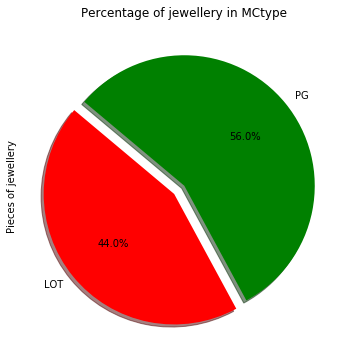

In [43]:
colors = ['red','green']
explode = (0.1, 0)

plt.figure(figsize=(12,6))
df1.groupby('MCType')['JwlPcs'].sum().plot(kind='pie', explode= explode, colors=colors, autopct='%1.1f%%',shadow=True,startangle=140)
plt.title('Percentage of jewellery in MCtype')
plt.ylabel("Pieces of jewellery")
plt.show()


#### Sales of jewellery according to the passage of time

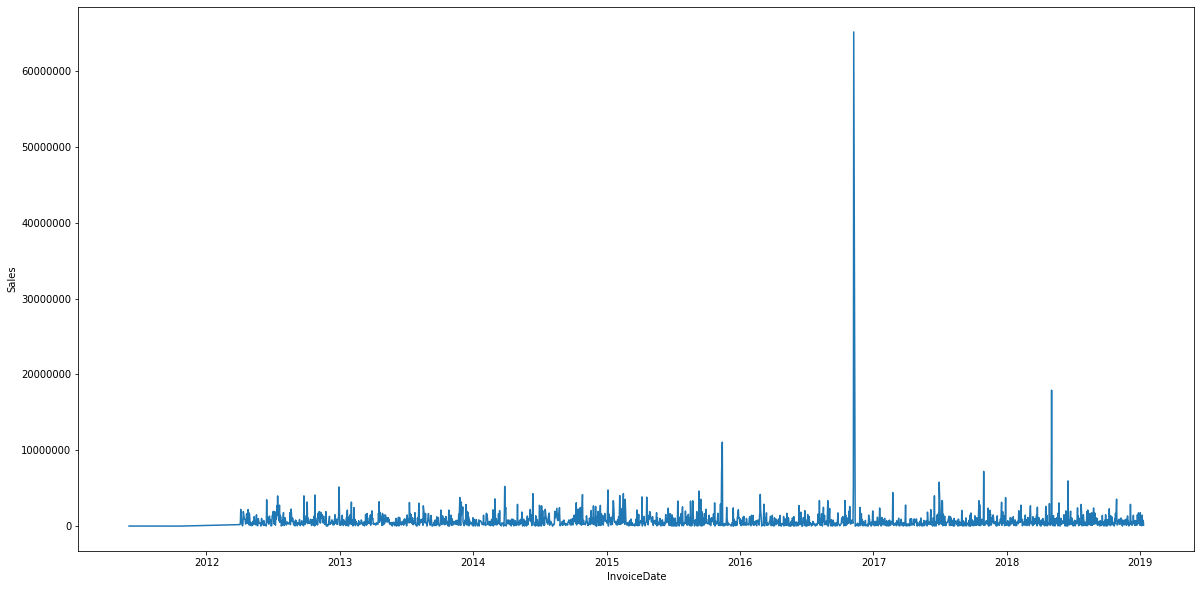

In [44]:
plt.figure(figsize=(20,10))
x1=df1.groupby('InvoiceDate')['JwlCost'].sum()
sns.lineplot(x1.index,x1)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.ylabel('Sales')
plt.show()

We can see a huge spike in the sales of jewellery in the month of November, 2016. This can be attributed to the fact that demonitisation occured in India during this period under the current Government. This sudden announcement led to people panicking all over the country to liquidate their cash in hand in fear of the Government discovering tax evasive techniques and other malpractices. We also felt this effect in this particular unit of jewellery shops based in Coimbatore, which attributed to huge sales of jewellery over a very short amount of time.

#### Prices of each collection of jewellery

<Figure size 1440x720 with 0 Axes>

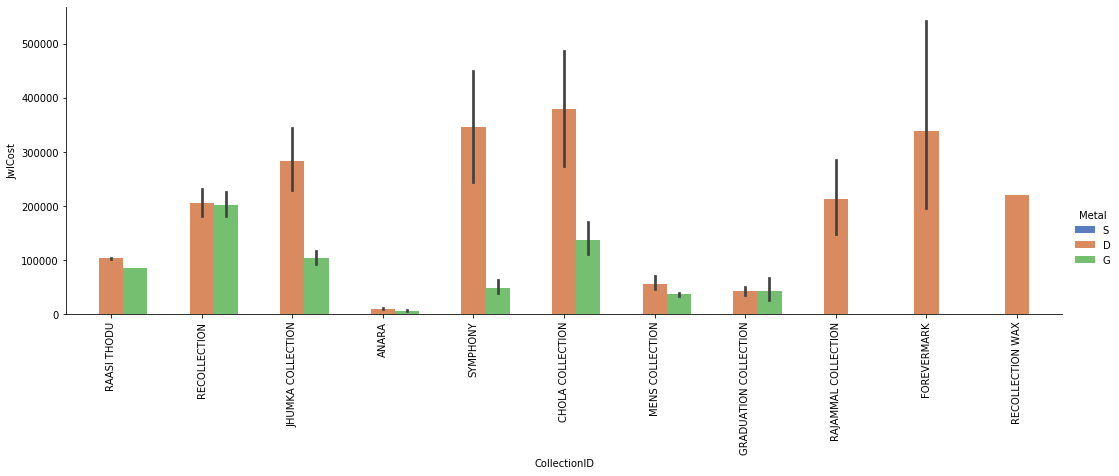

In [56]:
plt.figure(figsize=(20,10))
sns.catplot(x="CollectionID", y="JwlCost", hue="Metal", data=df1,
                kind="bar", aspect=3, palette="muted")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xticks(rotation = 90)
plt.show()

The recollection collection accounted for the majority of the cost of jewellery in the store, with an equal amount of gold and diamond jewellery offered by the collection. Most of the collections we see here are for diamond jewellery, with some for both diamond and gold.

### Dropping the columns for which Invoice date is absent, i.e. taking only the sold items into account

In [16]:
df2 = df1.dropna(axis=0, subset=['InvoiceDate'])

In [17]:
df2.shape

(18265, 23)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18265 entries, 0 to 23501
Data columns (total 23 columns):
Department         18265 non-null object
JewelGroup         18265 non-null object
JewelGroup_Sub     7704 non-null object
JewelType          18265 non-null object
Metal              18218 non-null object
MetalType          18265 non-null object
JewelDesc          18265 non-null object
JewelNo            18265 non-null object
JewelSlNo          18265 non-null object
JewelDate          18265 non-null datetime64[ns]
MCType             18265 non-null object
MC                 18265 non-null int64
UserId             18265 non-null object
JwlDesc            18265 non-null object
DISCOUNTSALE       18265 non-null object
UnitID             18265 non-null object
JwlPcs             18265 non-null int64
CollectionID       686 non-null object
InvoiceDate        18265 non-null datetime64[ns]
JwlCost            18265 non-null int64
CP_JwlCost         18265 non-null float64
DesignID           

In [36]:
df2.head()

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,JwlDesc,DISCOUNTSALE,UnitID,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key_true
0,Silver,Silver,NaN,1A,S,SL,Silver articles,135845,0,2008-03-31,...,One plate,N,C,1,NaN,2014-02-12,2656,2560.0,NaN,1A1358450
2,Silver,Silver,NaN,1A,S,SL,Silver articles,135932,0,2008-03-31,...,One kuthu villaku,N,C,1,NaN,2016-08-19,9821,8855.0,NaN,1A1359320
6,Silver,Silver,NaN,1A,S,SL,Silver articles,135958,0,2008-03-31,...,One plate with Engraving & Stand,N,C,1,NaN,2016-09-22,27202,25795.0,NaN,1A1359580
8,Silver,Silver,NaN,1A,S,SL,Silver articles,136092,0,2008-03-31,...,Serving Spoon,N,C,1,NaN,2015-07-06,5684,5336.0,NaN,1A1360920
9,Silver,Silver,NaN,1A,S,SL,Silver articles,136194,0,2008-03-31,...,One Napkin Ring,N,C,1,NaN,2013-01-31,2140,2015.0,NaN,1A1361940


We drop the rows that do not have an invoice date associated with them, i.e. they are unsold items. Here we only take the sold items and store them into a new dataframe df2.

In [18]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
MC,18265.0,8318.610293,14454.960482,0.0,717.0,3041.0,10000.0,328840.0
JwlPcs,18265.0,1.389433,1.339021,1.0,1.0,1.0,2.0,85.0
JwlCost,18265.0,84343.547112,224952.417620,114.0,6996.0,25544.0,90055.0,16140093.0
CP_JwlCost,18265.0,74272.464689,190850.562972,0.0,6012.0,22271.0,72044.0,11272798.0


#### Grouping by Department and Metal types

In [38]:
df2.groupby('Department')['JwlCost'].sum()

Department
Diamond     968183544
Gold        538940637
Jadau         3221282
Platinum      3455507
Repair         713451
Silver       26020467
Name: JwlCost, dtype: int64

Most of the jewellery in the store consists of diamond and gold jewellery with some silver items that the shop mostly makes for particular customer orders.

In [39]:
df2.groupby('Metal')['JwlCost'].sum()

Metal
D    973122727
G    539420762
S     27202327
Name: JwlCost, dtype: int64

In [40]:
#plt.figure(figsize=(20,10))
#sns.boxplot(x='Metal', y='JwlCost',data=df2)
#plt.xticks(rotation=90)
#plt.show()

In [41]:
df2.groupby('MetalType')['JwlCost'].sum()

MetalType
18    682389922
22    808803997
24     19151544
PL      4168958
SL     26020467
Name: JwlCost, dtype: int64

Jewel groups that sold the most. Mostly necklaces and ordered items sold a lot in the store. We can see that most of the share of silver jewellery comes from necklaces and order items.

<Figure size 720x360 with 0 Axes>

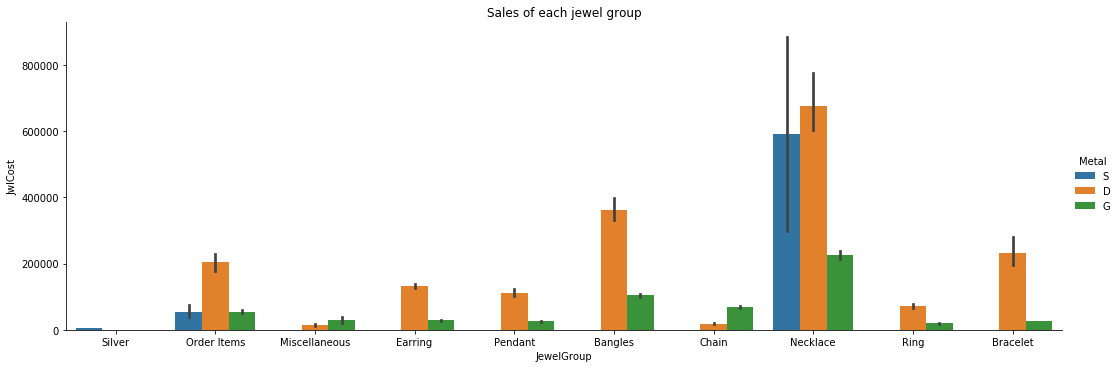

In [44]:
plt.figure(figsize=(10,5))
sns.catplot(x="JewelGroup", y="JwlCost", hue="Metal", data=df2,
                kind="bar",height=5, aspect=3)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.title("Sales of each jewel group")
plt.show()

#### Subgroups that sold the most

 The bridal collection brought a lot of sales, followed by chain, bangles and necklaces.

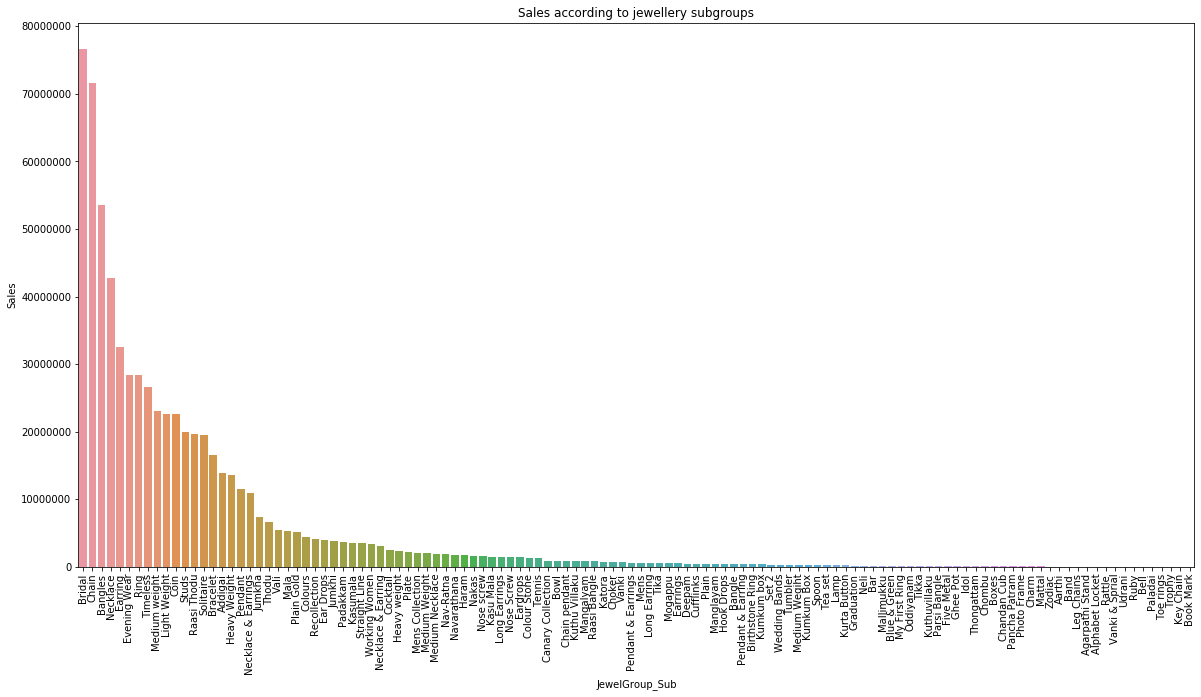

In [45]:
plt.figure(figsize=(20,10))
x1=df2.groupby('JewelGroup_Sub')['JwlCost'].sum().sort_values(ascending=False)
sns.barplot(x1.index,x1,orient='v')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.ylabel("Sales")
plt.title("Sales according to jewellery subgroups")
plt.show()

Quantity of items sold for each subgroup. Again, we see that coins make up for the majority of the item pieces that are sold from a particular jewellery subgroup. A majority of the sales of these coins are in the month of November because of the demonitsation issue in India that occurred during that period.

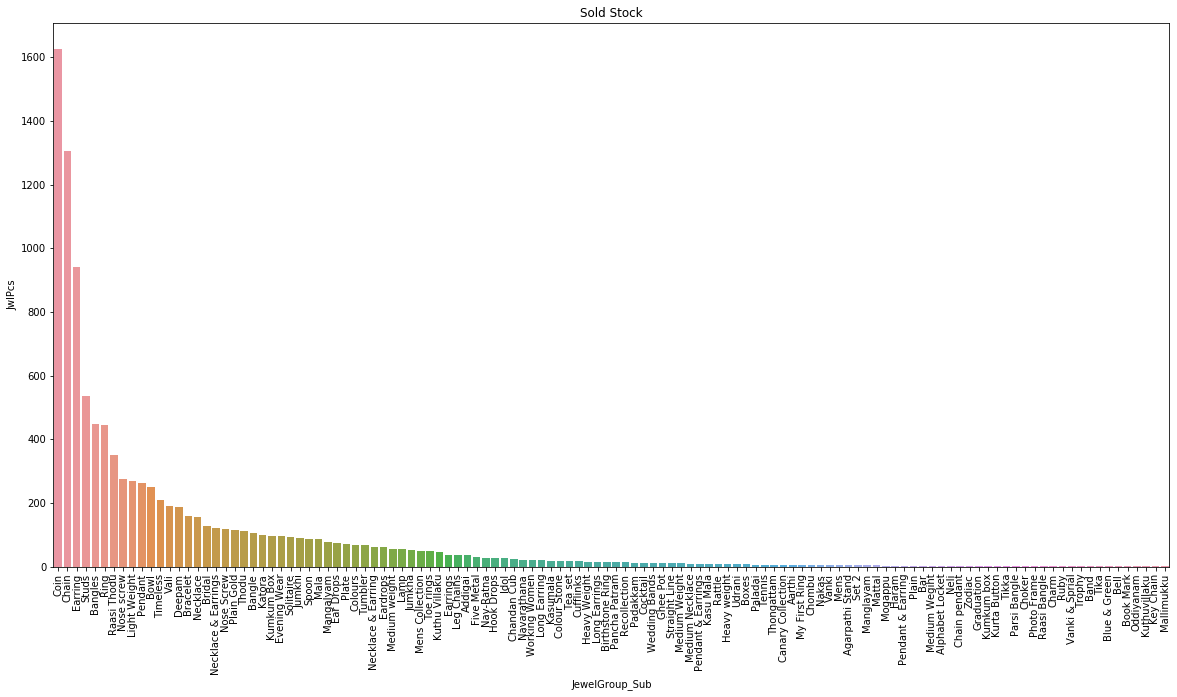

In [59]:
plt.figure(figsize=(20,10))
x1=df2.groupby('JewelGroup_Sub')['JwlPcs'].sum().sort_values(ascending=False)
sns.barplot(x1.index,x1,orient='v')
plt.xticks(rotation=90)
plt.title("Sold Stock")
plt.show()

### Calculating the Profit

A calculation of the profit for each individual item is given here, we calculate the profit by,

df2['Profit']= df2['JwlCost'] - df2['CP_JwlCost']  , where

df2['JwlCost'] - column having the selling price of each piece of jewellery

df2['CP_JwlCost'] - column having the cost price of each piece of jewellery

In [46]:
df2['Profit']=df2['JwlCost']-df2['CP_JwlCost']

In [47]:
df2.head()

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,DISCOUNTSALE,UnitID,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key_true,Profit
0,Silver,Silver,NaN,1A,S,SL,Silver articles,135845,0,2008-03-31,...,N,C,1,NaN,2014-02-12,2656,2560.0,NaN,1A1358450,96.0
2,Silver,Silver,NaN,1A,S,SL,Silver articles,135932,0,2008-03-31,...,N,C,1,NaN,2016-08-19,9821,8855.0,NaN,1A1359320,966.0
6,Silver,Silver,NaN,1A,S,SL,Silver articles,135958,0,2008-03-31,...,N,C,1,NaN,2016-09-22,27202,25795.0,NaN,1A1359580,1407.0
8,Silver,Silver,NaN,1A,S,SL,Silver articles,136092,0,2008-03-31,...,N,C,1,NaN,2015-07-06,5684,5336.0,NaN,1A1360920,348.0
9,Silver,Silver,NaN,1A,S,SL,Silver articles,136194,0,2008-03-31,...,N,C,1,NaN,2013-01-31,2140,2015.0,NaN,1A1361940,125.0


<Figure size 1440x720 with 0 Axes>

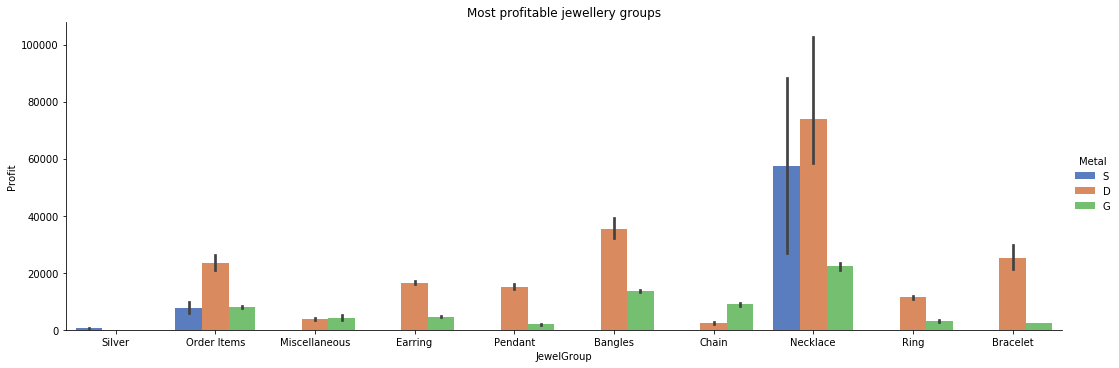

In [70]:
plt.figure(figsize=(20,10))
sns.catplot(x="JewelGroup", y="Profit", hue="Metal", data=df2,
                kind="bar",height=5, aspect=3, palette='muted')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.title("Most profitable jewellery groups")
plt.ylabel("Profit")
plt.show()

Again, necklaces and order items bring in the most profit for the jewellery store, with diamond jewellery leading the profits.

<Figure size 1440x720 with 0 Axes>

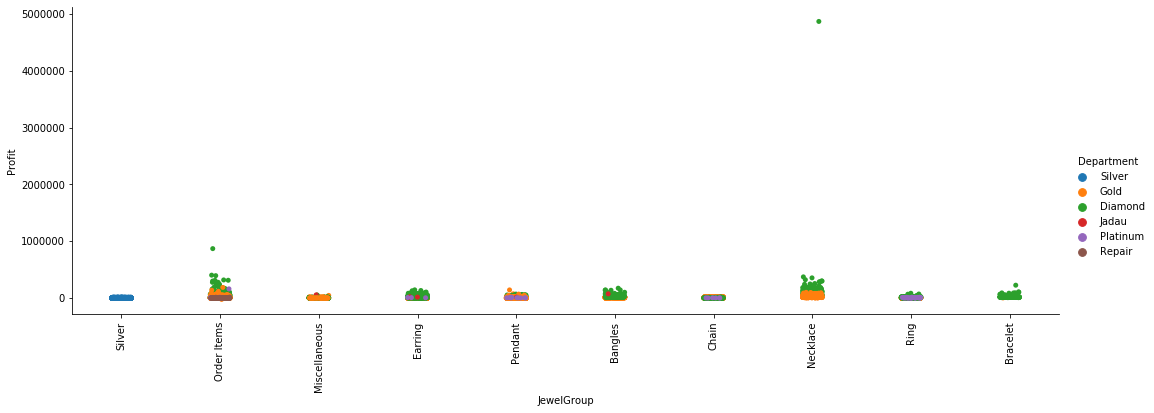

In [127]:
plt.figure(figsize=(20,10))
sns.catplot(x='JewelGroup', y='Profit',hue='Department',kind='strip',data=df2,aspect=3)
plt.xticks(rotation=90)
plt.show()

A representation of the outliers present in the data set. This makes plotting individual data points of the dataset not worthwhile and it doesn't give us a clear idea about the spread.

In [63]:
df2.groupby('JewelGroup_Sub')['Profit'].sum()

JewelGroup_Sub
Aarthi                  2515.00
Addigai              1295989.80
Agarpathi Stand         2101.00
Alphabet Locket         3750.00
Band                    8590.00
Bangle                131385.00
Bangles              5503954.50
Bar                    20770.00
Bell                     756.00
Birthstone Ring        70684.20
Blue & Green           13836.80
Book Mark                750.00
Bowl                   52239.80
Boxes                   4954.00
Bracelet             1945140.74
Bridal               7604535.47
Canary Collection      89850.09
Chain                9390066.39
Chain pendant          83468.66
Chandan Cub             3175.00
Charm                  10786.80
Choker                 69576.18
Chombu                  3592.00
Cocktail              294530.79
Coin                 1118817.27
Colour Stone          140612.49
Colours               588122.49
Cufflinks              85084.00
Deepam                 21270.00
Ear Drops             536846.06
                        .

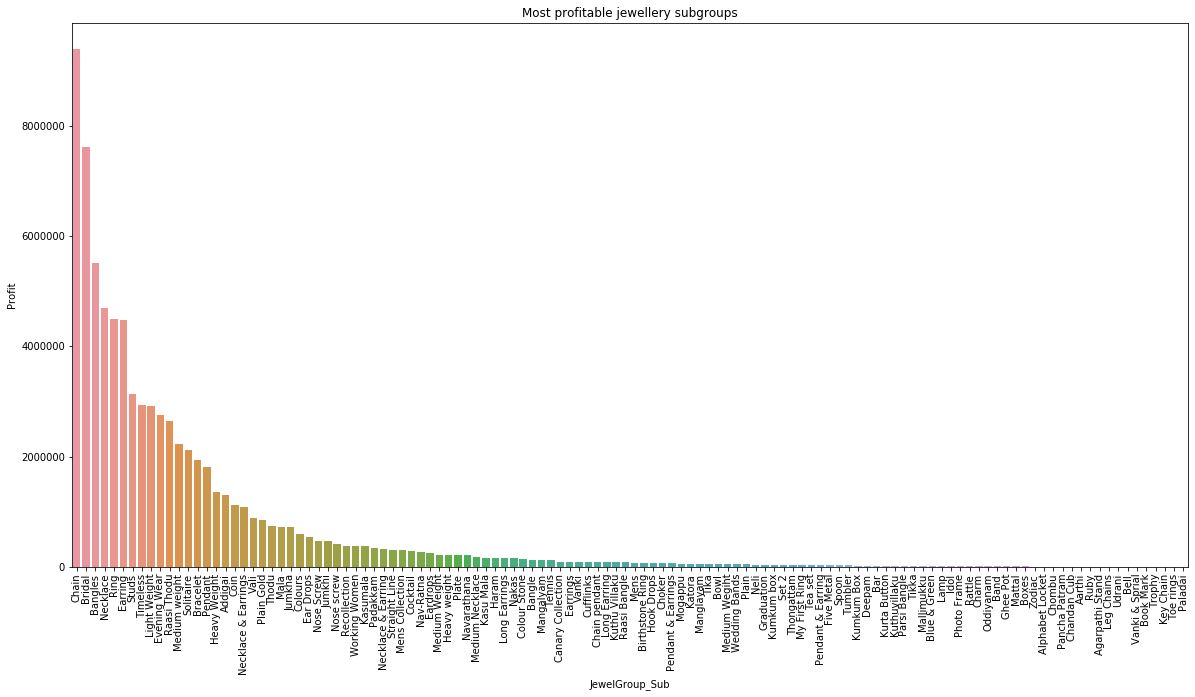

In [80]:
plt.figure(figsize=(20,10))
x1=df2.groupby('JewelGroup_Sub')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x1.index,x1,orient='v')
plt.xticks(rotation=90)
plt.title('Most profitable jewellery subgroups')
plt.ylabel('Profit')
plt.show()

The most profitable jewellery subgroups plotted here to give an idea about what the jewellery store should be concentrating on, if they are only looking at profit. Other factors however, are not taken into account here, so a decision cannot be solely made of the basis of this representation. Here we see again that chains, or necklaces make up for most of the profit turnover of the jewellery shop. This is followed by the bridal collection of jewellery, which once again is clearly quite profitable.

<Figure size 1440x720 with 0 Axes>

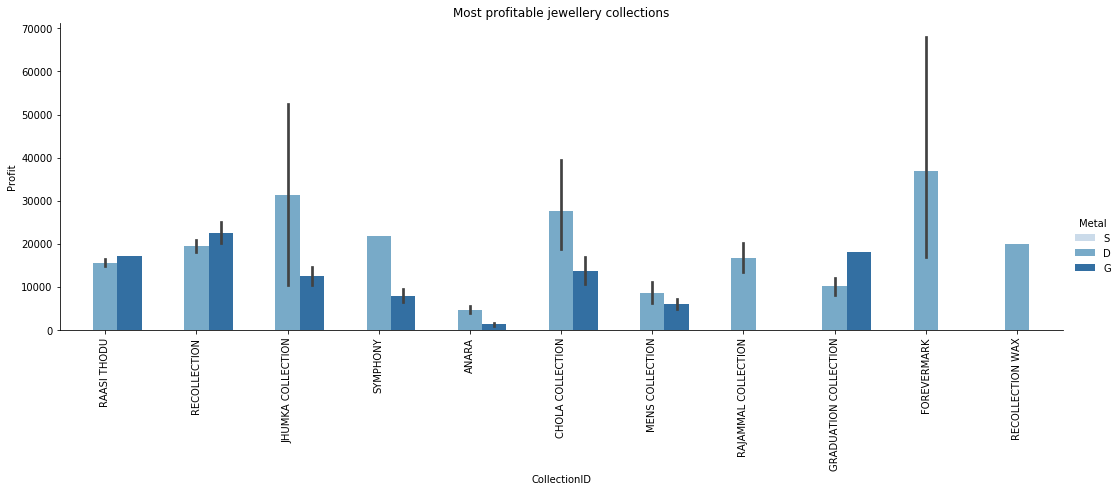

In [75]:
plt.figure(figsize=(20,10))
sns.catplot(x="CollectionID", y="Profit", hue="Metal", data=df2,
                kind="bar",height=5, aspect=3, palette = 'Blues')
plt.xticks(rotation=90)
plt.title('Most profitable jewellery collections')
plt.ylabel('Profit')
plt.show()

A breakdown of the most profitable jewellery collections in the store, which once again only has diamond and gold jewellery, so here silver jewellery is not taken into account.  We can see that Recollection and Forevermark being the most profitable collections, while Men's collection doesn't seem to be much profitable. 

<Figure size 720x1440 with 0 Axes>

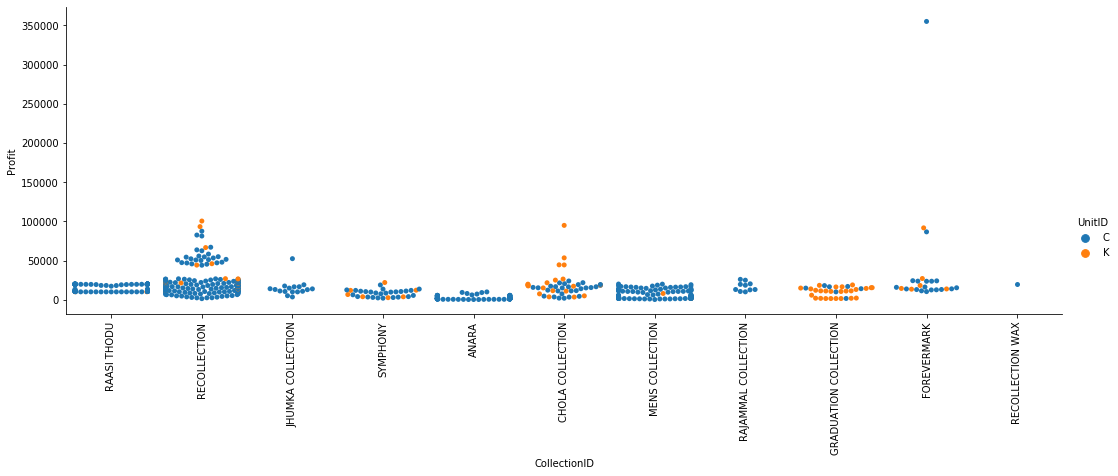

In [81]:
plt.figure(figsize=(10,20))
sns.catplot(x='CollectionID', y='Profit', hue='UnitID',kind='swarm',data=df2,aspect=3)
plt.xticks(rotation=90)
plt.show()

A swarmplot showing the most profitable jewellery collections, belong to the two units C and K. We observe the outliers here in the dataset, with most of them in the chola and recollection collections, with a huge outlier in the forevermark collection.

### Calculating the lead time

A calculation of the lead time is done, lead time referring to the amount of time a jewellery spends in the shop before being sold. This is also an important factor to take into account because of the fact that huge profits may lead to people believing that a piece of jewellery is profitable when it has been lying in stock for a large amount of time, thus negating the amount of returns from it. Lead time is calculated by,

df2['LeadTime'] = df2['InvoiceDate'] - df2['JewelDate'] , where

df2['InvoiceDate'] - The date of billing or when the jewellery is sold.

df2['JewelDate'] - The date when the piece of jewellery is added to the store.

In [48]:
df2['LeadTime']=df2['InvoiceDate']-df2['JewelDate']

In [49]:
df2.head()

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,UnitID,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key_true,Profit,LeadTime
0,Silver,Silver,NaN,1A,S,SL,Silver articles,135845,0,2008-03-31,...,C,1,NaN,2014-02-12,2656,2560.0,NaN,1A1358450,96.0,2144 days
2,Silver,Silver,NaN,1A,S,SL,Silver articles,135932,0,2008-03-31,...,C,1,NaN,2016-08-19,9821,8855.0,NaN,1A1359320,966.0,3063 days
6,Silver,Silver,NaN,1A,S,SL,Silver articles,135958,0,2008-03-31,...,C,1,NaN,2016-09-22,27202,25795.0,NaN,1A1359580,1407.0,3097 days
8,Silver,Silver,NaN,1A,S,SL,Silver articles,136092,0,2008-03-31,...,C,1,NaN,2015-07-06,5684,5336.0,NaN,1A1360920,348.0,2653 days
9,Silver,Silver,NaN,1A,S,SL,Silver articles,136194,0,2008-03-31,...,C,1,NaN,2013-01-31,2140,2015.0,NaN,1A1361940,125.0,1767 days


Adding a day to the leadtime to avoid the same day item sold dilemma.

In [50]:
from datetime import timedelta
df2['LeadTime']=df2['LeadTime']+timedelta(days=1)

In [51]:
df2.head()

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,UnitID,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key_true,Profit,LeadTime
0,Silver,Silver,NaN,1A,S,SL,Silver articles,135845,0,2008-03-31,...,C,1,NaN,2014-02-12,2656,2560.0,NaN,1A1358450,96.0,2145 days
2,Silver,Silver,NaN,1A,S,SL,Silver articles,135932,0,2008-03-31,...,C,1,NaN,2016-08-19,9821,8855.0,NaN,1A1359320,966.0,3064 days
6,Silver,Silver,NaN,1A,S,SL,Silver articles,135958,0,2008-03-31,...,C,1,NaN,2016-09-22,27202,25795.0,NaN,1A1359580,1407.0,3098 days
8,Silver,Silver,NaN,1A,S,SL,Silver articles,136092,0,2008-03-31,...,C,1,NaN,2015-07-06,5684,5336.0,NaN,1A1360920,348.0,2654 days
9,Silver,Silver,NaN,1A,S,SL,Silver articles,136194,0,2008-03-31,...,C,1,NaN,2013-01-31,2140,2015.0,NaN,1A1361940,125.0,1768 days


Converting the timedelta datatype into int datatype for ease of calculations.

In [52]:
df2['leadTime']=df2['LeadTime'].dt.days

In [53]:
df2.head()

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key_true,Profit,LeadTime,leadTime
0,Silver,Silver,NaN,1A,S,SL,Silver articles,135845,0,2008-03-31,...,1,NaN,2014-02-12,2656,2560.0,NaN,1A1358450,96.0,2145 days,2145
2,Silver,Silver,NaN,1A,S,SL,Silver articles,135932,0,2008-03-31,...,1,NaN,2016-08-19,9821,8855.0,NaN,1A1359320,966.0,3064 days,3064
6,Silver,Silver,NaN,1A,S,SL,Silver articles,135958,0,2008-03-31,...,1,NaN,2016-09-22,27202,25795.0,NaN,1A1359580,1407.0,3098 days,3098
8,Silver,Silver,NaN,1A,S,SL,Silver articles,136092,0,2008-03-31,...,1,NaN,2015-07-06,5684,5336.0,NaN,1A1360920,348.0,2654 days,2654
9,Silver,Silver,NaN,1A,S,SL,Silver articles,136194,0,2008-03-31,...,1,NaN,2013-01-31,2140,2015.0,NaN,1A1361940,125.0,1768 days,1768


In [54]:
df2['JewelDesc']=df2['JewelDesc'].str.lower()

In [55]:
df2['JwlDesc']=df2['JwlDesc'].str.lower()

#### Grouping the metal types according to lead time

In [56]:
df2.groupby('Metal')['leadTime'].mean().sort_values(ascending=False)

Metal
S    712.073659
D    482.174338
G    376.593306
Name: leadTime, dtype: float64

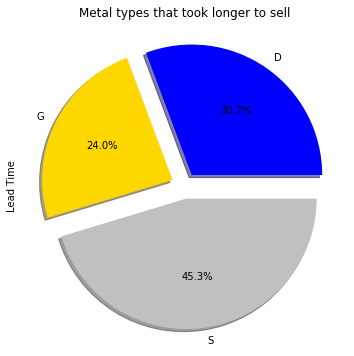

In [117]:
colors = ['blue','gold','silver']
explode = (0.1, 0.1, 0.1)

plt.figure(figsize=(12,6))
df2.groupby('Metal')['leadTime'].mean().plot(kind='pie', explode= explode, colors=colors, autopct='%1.1f%%',shadow=True)
plt.title('Metal types that took longer to sell')
plt.ylabel("Lead Time")
plt.show()

From here we can clearly see that silver jewellery takes a lot of time to sell, followed by diamond and gold sells the fastest.

#### Jewellery Categories that sold the fastest

Here we can see that ordered items are the fastest selling jewellery group because the customer picks up the jewellery within a few days after the ordered items arrive at the store. We can also notice that gold jewellery belonging to the bracelet category takes a long amount of time to sell, followed by rings of both diamond and gold metal type.

<Figure size 1440x720 with 0 Axes>

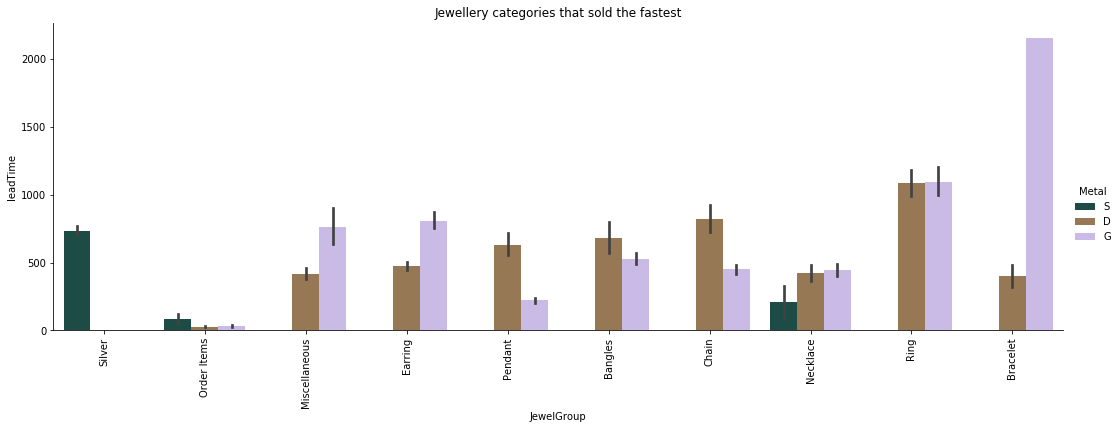

In [118]:
plt.figure(figsize=(20,10))
sns.catplot(x="JewelGroup", y="leadTime", hue="Metal", data=df2, kind="bar",height=5, aspect=3, palette = 'cubehelix')
plt.xticks(rotation=90)
plt.title('Jewellery categories that sold the fastest')
plt.show()

In [119]:
df2.groupby('JewelDesc')['leadTime'].mean().sort_values(ascending=False)

JewelDesc
jadau cufflinks           3037.000000
fancy jewels              1861.000000
miscellaneous             1708.140625
one ring                  1090.958930
silver articles            733.949184
one pair earrings          615.700986
one pair bangles           561.687135
one chain                  538.066061
one pair jadau earring     467.250000
one necklace               435.653257
one bracelet               410.601307
18 kt plain gold items     369.411765
one nosering               348.110429
one pendant                304.692246
one nose screw             289.422222
one jadau pendant          210.000000
jadau necklace             208.500000
one coin                   165.204663
silver jewel ornaments      81.504587
jewel                       59.729201
jewel (repair)              24.149606
jadau bangle                 2.000000
Name: leadTime, dtype: float64

#### Individual items that took the most amount of time to sell, and the least amount of time to sell.

In [120]:
df2.groupby('JwlDesc')['leadTime'].mean().sort_values(ascending=False)

JwlDesc
one chain  (cost 2900)                                            5199.000000
p & e/s.                                                          4934.000000
ear screw                                                         4710.000000
p( 18kt.gd 0.590 value adj mc)lav-11390                           4299.000000
ring (lav 11367)                                                  4298.000000
p(18kt.gd 1.309 value adj mc)lav 11369                            4298.000000
p(18kt.gd 1.290 value adj mc)josh-l6                              4298.000000
r(18kt.gd 0.833 value adj mc)lav - 11373                          4241.000000
one ring (josh u.no.jnm15)                                        4077.000000
e/s.                                                              4075.000000
ring ud 0152 gold wt .220grams                                    4047.000000
one ring (18 kt..520gms)                                          4025.000000
p(24kt.gd 0.497 value adj mc)lav-11389                  

#### Jewellery subgroups that sold the fastest

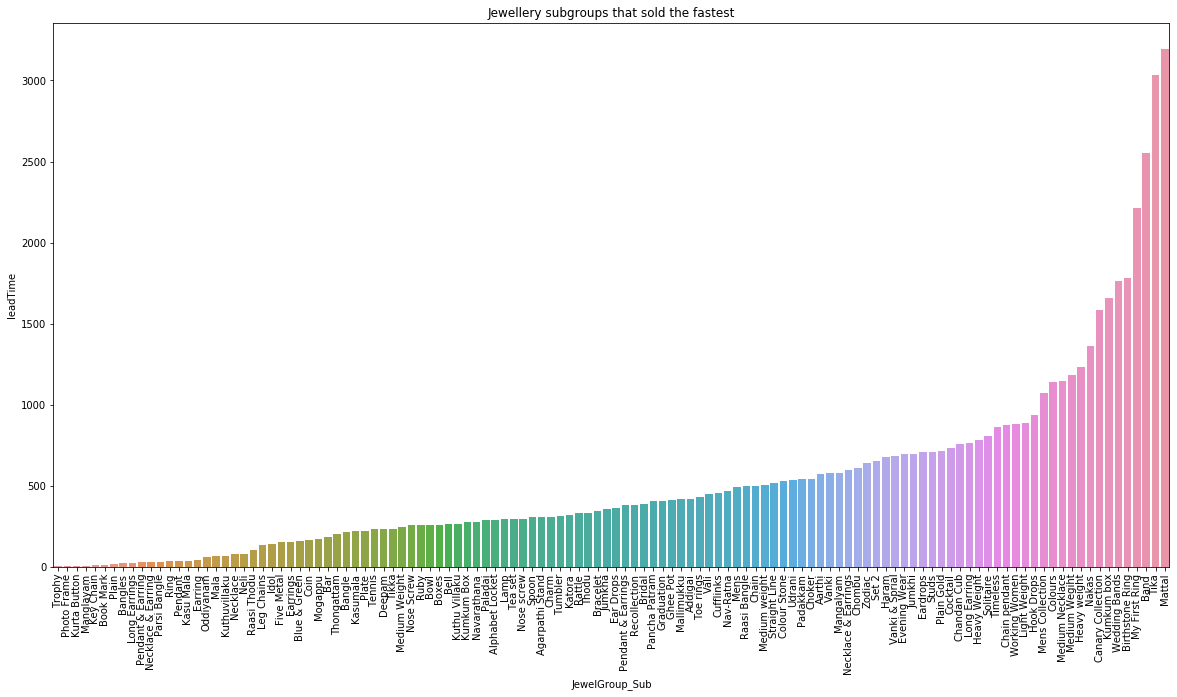

In [121]:
plt.figure(figsize=(20,10))
x=df2.groupby('JewelGroup_Sub')['leadTime'].mean().sort_values(ascending=True)
sns.barplot(x.index,x,orient='v')
plt.xticks(rotation=90)
plt.title('Jewellery subgroups that sold the fastest')
plt.show()

The subgroups of jewellery that sold the fastest. We see that the fastest selling jewellery are ordered items such as photo frames, trophies, etc. The mattal and tika subgroups took the most amount of time to sell.

<Figure size 1440x720 with 0 Axes>

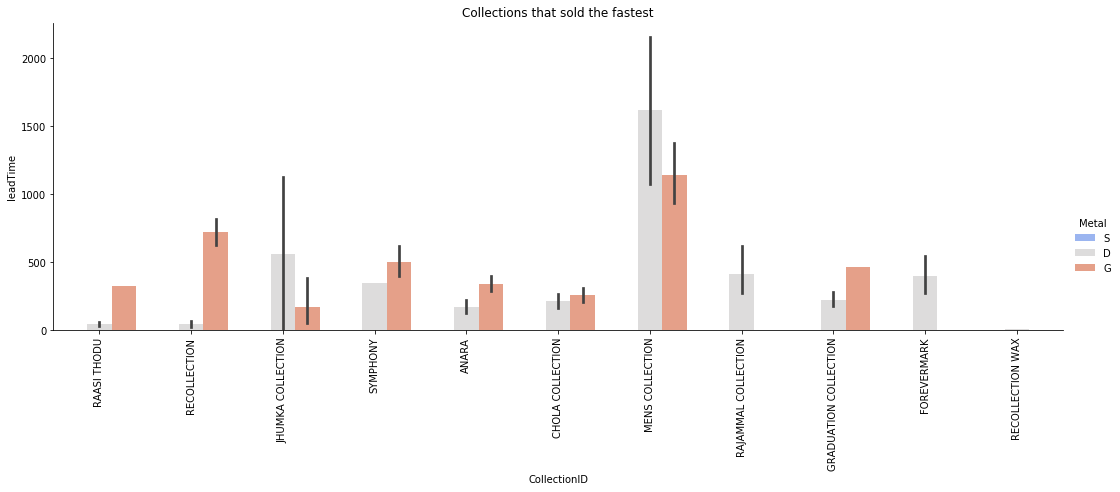

In [122]:
plt.figure(figsize=(20,10))
sns.catplot(x="CollectionID", y="leadTime", hue="Metal", data=df2, kind="bar",height=5, aspect=3, palette = 'coolwarm')
plt.xticks(rotation=90)
plt.title('Collections that sold the fastest')
plt.show()

Here we see a visualisation of the jewellery collections that sold the fastest. The main takeaway here is that the men's collection takes an unnatural amount of time to sell, along with the gold jewellery belong to the recollection collection. Rest take average amount of time to sell (around 500 days).

<Figure size 720x1440 with 0 Axes>

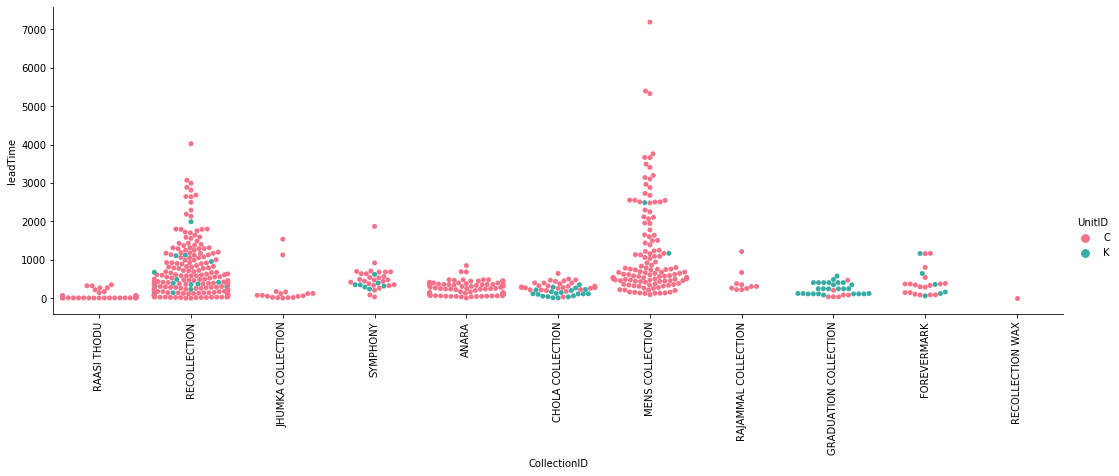

In [123]:
plt.figure(figsize=(10,20))
sns.catplot(x='CollectionID', y='leadTime', hue='UnitID',kind='swarm',data=df2,aspect=3, palette ='husl')
plt.xticks(rotation=90)
plt.show()

A swarmplot illustrating the various datapoints corresponding to different jewellery collections and the time they take to sell. Here we see a lot of outliers in the Recollection and Men's collections. We can see the most amount of outliers in the Men's collection, which takes a long time to sell.

<Figure size 720x1440 with 0 Axes>

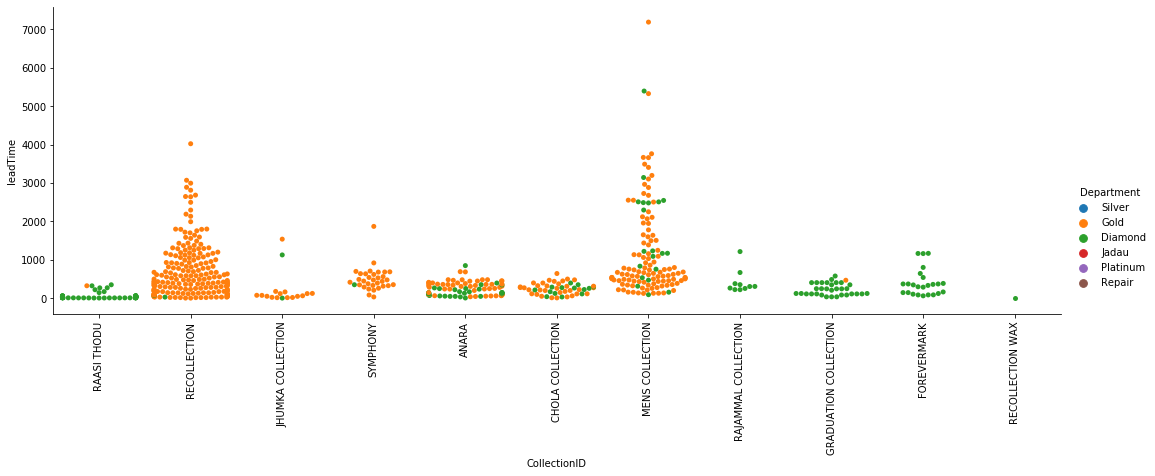

In [124]:
plt.figure(figsize=(10,20))
sns.catplot(x='CollectionID', y='leadTime', hue='Department',kind='swarm',data=df2,aspect=3)
plt.xticks(rotation=90)
plt.show()

The same swarmplot, this time taking into consideration the different departments the jewellery belongs to. We see that most of the jewellery in the collections are from gold and diamond departments and most of the outliers are specifically gold jewellery. From this we can infer that gold jewellery belonging to the Men's collection and Recollection collections take the most amount of time to sell.

### Taking into account only the dead stock (items lying in stock without being sold)

Here we only take into account the dead stock, i.e. the items that are yet to be sold. For this, we take only the rows where the Invoice date is missing and store it in another dataframe.

In [57]:
df3=df1[df1['InvoiceDate'].isnull()]

In [58]:
df3.head()

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,JwlDesc,DISCOUNTSALE,UnitID,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key_true
1,Silver,Silver,NaN,1A,S,SL,Silver articles,135853,0,2008-03-31,...,One plate,N,C,1,NaN,NaT,1855,1750.0,NaN,1A1358530
3,Silver,Silver,NaN,1A,S,SL,Silver articles,135946,0,2008-03-31,...,One plate,N,C,1,NaN,NaT,7420,7000.0,NaN,1A1359460
4,Silver,Silver,NaN,1A,S,SL,Silver articles,135947,0,2008-03-31,...,One plate,N,C,1,NaN,NaT,7420,7000.0,NaN,1A1359470
5,Silver,Silver,NaN,1A,S,SL,Silver articles,135949,0,2008-03-31,...,One plate,N,C,1,NaN,NaT,9328,8800.0,NaN,1A1359490
7,Silver,Silver,NaN,1A,S,SL,Silver articles,136028,0,2008-03-31,...,Agarpathi Stant,N,C,1,NaN,NaT,2292,1750.0,NaN,1A1360280


In [59]:
df3.shape

(5255, 23)

In [60]:
import datetime as datetime

#### Taking today's date and calculating the amount of time the item's been lying in stock.

In [61]:
df3['currentdate']=datetime.date.today()
df3['currentdate']=pd.to_datetime(df3['currentdate']) 

In [62]:
df3['LeadTime']=df3['currentdate']-df3['JewelDate']

In [63]:
df3['LeadTime']=df3['LeadTime']+timedelta(days=1)

In [64]:
df3['leadTime']=df3['LeadTime'].dt.days

In [133]:
df3.head()

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key_true,currentdate,LeadTime,leadTime
1,Silver,Silver,NaN,1A,S,SL,Silver articles,135853,0,2008-03-31,...,1,NaN,NaT,1855,1750.0,NaN,1A1358530,2019-11-06,4238 days,4238
3,Silver,Silver,NaN,1A,S,SL,Silver articles,135946,0,2008-03-31,...,1,NaN,NaT,7420,7000.0,NaN,1A1359460,2019-11-06,4238 days,4238
4,Silver,Silver,NaN,1A,S,SL,Silver articles,135947,0,2008-03-31,...,1,NaN,NaT,7420,7000.0,NaN,1A1359470,2019-11-06,4238 days,4238
5,Silver,Silver,NaN,1A,S,SL,Silver articles,135949,0,2008-03-31,...,1,NaN,NaT,9328,8800.0,NaN,1A1359490,2019-11-06,4238 days,4238
7,Silver,Silver,NaN,1A,S,SL,Silver articles,136028,0,2008-03-31,...,1,NaN,NaT,2292,1750.0,NaN,1A1360280,2019-11-06,4238 days,4238


In [134]:
df3['JewelDesc']=df3['JewelDesc'].str.lower()

In [135]:
df3.groupby('JewelGroup_Sub')['leadTime'].mean().sort_values(ascending=True)

JewelGroup_Sub
Neli Ring                302.333333
Bangle                   314.000000
Neli                     317.000000
Bangles                  356.000000
Plain                    357.000000
Long Earrings            383.000000
Saradu                   386.000000
Earring                  397.800000
Choker                   405.750000
Parsi Bangle             423.000000
Varahala Mala            468.000000
Necklace                 558.888889
Peg Measure              593.000000
Thongattam               598.000000
Five Metal               629.000000
Udrani                   644.062500
Blue & Green             651.571429
Tennis                   654.000000
Chain pendant            678.125000
Leg Chains               694.062500
Ghee Pot                 748.090909
Pancha Patram            748.153846
Nose screw               750.765714
Kumkum Box               822.333333
Fork                     843.000000
Vanki & Sprial           853.000000
Kasumala                 880.857143
Kuthu Villaku

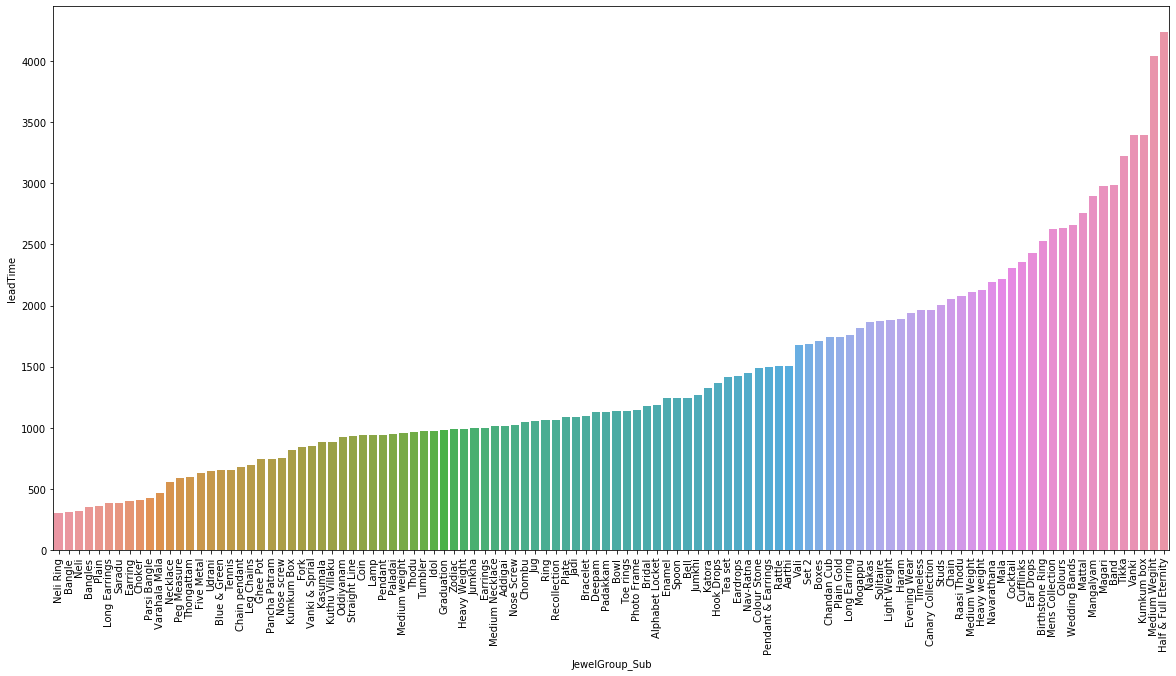

In [136]:
plt.figure(figsize=(20,10))
x=df3.groupby('JewelGroup_Sub')['leadTime'].mean().sort_values(ascending=True)
sns.barplot(x.index,x,orient='v')
plt.xticks(rotation=90)
plt.show()

The subgroups categorised by the amount of time that they've been lying in stock. We see that the Half and Full eternity and medium weight jewellery subgroups are lying in stock for the most amount of time, so it might be wise to not manufacture these type of jewellery.

### Calculating the profit per day (Profit/leadtime)

The profit per day is calculated by dividing the profit by the lead time. It give us a measure of the profit the jewellery is bringing to the shop, on a per day basis.

In [65]:
df2['profitperday']=(df2['Profit'])/(df2['leadTime'])

In [66]:
df2.head()

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key_true,Profit,LeadTime,leadTime,profitperday
0,Silver,Silver,NaN,1A,S,SL,silver articles,135845,0,2008-03-31,...,NaN,2014-02-12,2656,2560.0,NaN,1A1358450,96.0,2145 days,2145,0.044755
2,Silver,Silver,NaN,1A,S,SL,silver articles,135932,0,2008-03-31,...,NaN,2016-08-19,9821,8855.0,NaN,1A1359320,966.0,3064 days,3064,0.315274
6,Silver,Silver,NaN,1A,S,SL,silver articles,135958,0,2008-03-31,...,NaN,2016-09-22,27202,25795.0,NaN,1A1359580,1407.0,3098 days,3098,0.454164
8,Silver,Silver,NaN,1A,S,SL,silver articles,136092,0,2008-03-31,...,NaN,2015-07-06,5684,5336.0,NaN,1A1360920,348.0,2654 days,2654,0.131123
9,Silver,Silver,NaN,1A,S,SL,silver articles,136194,0,2008-03-31,...,NaN,2013-01-31,2140,2015.0,NaN,1A1361940,125.0,1768 days,1768,0.070701


### Calculating the profit percentage

Here we find out the profit percentage for each item, given by

df2['Profitpercent']= ( df2['Profit'] / df2['CP_JwlCost'] ) * 100 , where

df2['Profit'] - The profit earned from the item.
df2['CP_JwlCost'] - The cost price of the item.

The profit is given in percentage (%).

In [67]:
df2['Profitpercent']=(df2['Profit']/df2['CP_JwlCost'])*100

In [68]:
df2.head()

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key_true,Profit,LeadTime,leadTime,profitperday,Profitpercent
0,Silver,Silver,NaN,1A,S,SL,silver articles,135845,0,2008-03-31,...,2014-02-12,2656,2560.0,NaN,1A1358450,96.0,2145 days,2145,0.044755,3.750000
2,Silver,Silver,NaN,1A,S,SL,silver articles,135932,0,2008-03-31,...,2016-08-19,9821,8855.0,NaN,1A1359320,966.0,3064 days,3064,0.315274,10.909091
6,Silver,Silver,NaN,1A,S,SL,silver articles,135958,0,2008-03-31,...,2016-09-22,27202,25795.0,NaN,1A1359580,1407.0,3098 days,3098,0.454164,5.454545
8,Silver,Silver,NaN,1A,S,SL,silver articles,136092,0,2008-03-31,...,2015-07-06,5684,5336.0,NaN,1A1360920,348.0,2654 days,2654,0.131123,6.521739
9,Silver,Silver,NaN,1A,S,SL,silver articles,136194,0,2008-03-31,...,2013-01-31,2140,2015.0,NaN,1A1361940,125.0,1768 days,1768,0.070701,6.203474


In [69]:
df2['Profitpercent']

0           3.750000
2          10.909091
6           5.454545
8           6.521739
9           6.203474
10          6.493506
11          6.493506
12          6.493506
13          6.493506
14          6.811989
27          5.916911
28          2.894356
29          1.818182
30          1.863933
31          2.040816
32         10.976948
36          9.523810
37          9.523810
42          5.454545
43          6.000000
45          7.894737
50          5.454545
51          5.454545
54          6.000000
55          7.272727
56          4.444444
57          8.000000
58          6.000000
60          6.000000
61          5.917513
            ...     
23472    1350.000000
23473     396.296296
23474     166.031746
23475     176.923077
23476     517.714286
23477      77.314815
23478     324.761905
23479    1138.095238
23480      89.142857
23481     128.089888
23482     245.396825
23483     112.037037
23484     189.743590
23485     303.428571
23486     147.058824
23487     136.814159
23488     201

Eliminating the values for which the Jewel Cost is not given. Some of the jewellery were missing the values for their cost price, which were given as zero. Since the no. of items that were missing these values were very few, we eliminate these items.

In [70]:
df2=df2[df2['CP_JwlCost']!=0]

In [71]:
df2.shape

(18231, 28)

In [72]:
df2.to_excel('samplejewel.xlsx')

In [145]:
#plt.figure(figsize=(10,20))
#sns.catplot(x='JewelGroup', y='Profitpercent', hue='Department',kind='swarm',data=df2,aspect=3)
#plt.xticks(rotation=90)
#plt.show()

#### Most profitable jewellery groups

<Figure size 864x432 with 0 Axes>

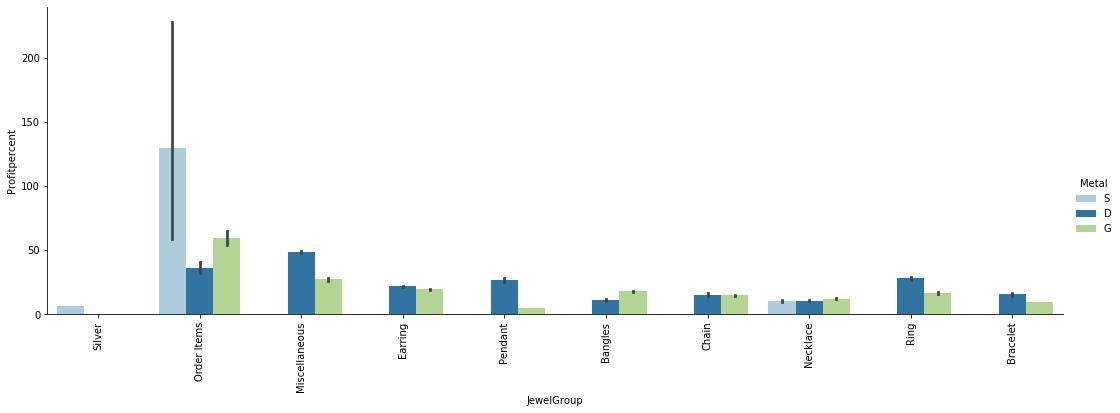

In [149]:
plt.figure(figsize=(12,6))
sns.catplot(x="JewelGroup", y="Profitpercent", hue="Metal", data=df2, kind="bar",height=5, aspect=3, palette = 'Paired')
plt.xticks(rotation=90)
plt.show()

We can conclude from this barplot that Order items are the most profitable items in the store if we take into account the percentage of profit they bring, compared to their costs. The shop can try to integrate online ordering of items more into their plans from the years moving forward as this seems to be a good indication of profit. Ordering allows items to be more customisable to customers, which could be the reason for the high profits they bring. Silver jewellery is the leading metal type of items that customers order.

#### Most profitable jewellery subgroups (% wise)

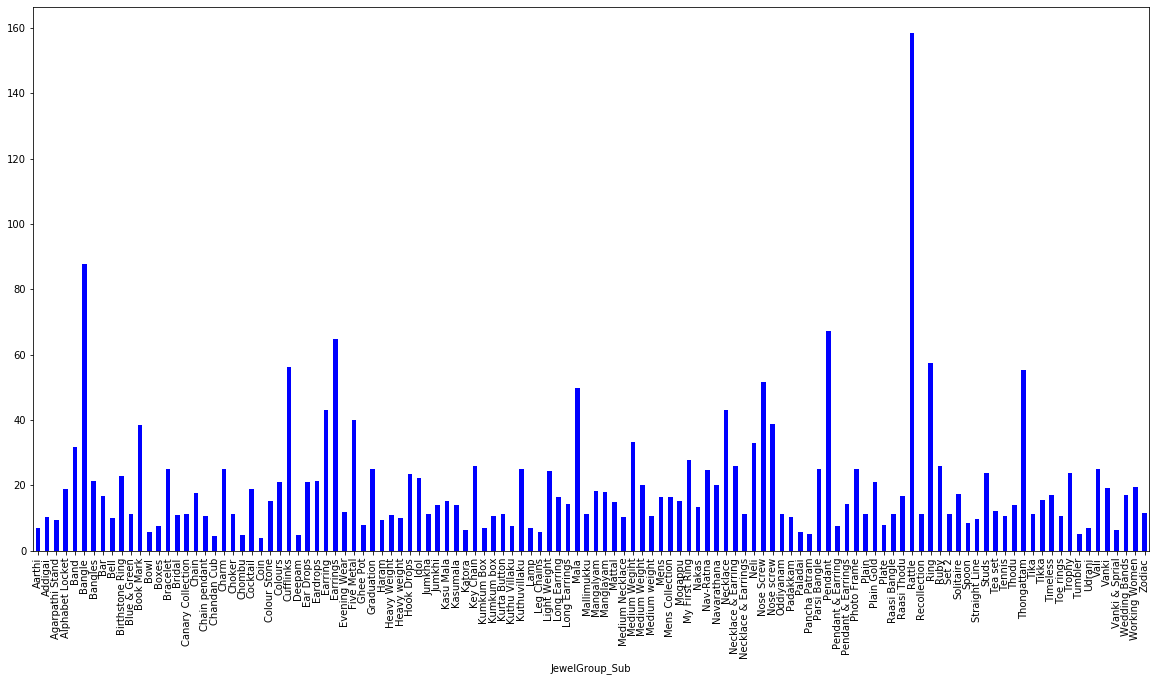

In [107]:
plt.figure(figsize=(20,10))
df2.groupby('JewelGroup_Sub')['Profitpercent'].mean().plot(kind='bar',color='b')
plt.xticks(rotation=90)
plt.show()

From the most profitable jewellery subgroups (% wise), we see that the rattle subgroup is extremely profitable, followed by some other profitable subgroups such as band, cufflinks, earrings, mala, nose screw, pendant, ring and thongattam.

### We divide the dataset into different time periods to analyse the sales pattern of each year.

In [55]:
start_date=pd.to_datetime("2018-01-01").date()
end_date=pd.to_datetime("2018-12-31").date()
mask = df2[(df2['InvoiceDate'].dt.date > start_date) & (df2['InvoiceDate'].dt.date <= end_date)]
mask

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,JwlDesc,DISCOUNTSALE,UnitID,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key_true
43,Silver,Silver,NaN,1A,S,SL,Silver articles,136779,0,2008-03-31,...,Nakas Plate,N,C,1,NaN,2018-10-25,10017,9450.0,NaN,1A1367790
60,Silver,Silver,NaN,1A,S,SL,Silver articles,137011,0,2008-03-31,...,Nakas Plate,N,C,1,NaN,2018-11-02,13939,13150.0,NaN,1A1370110
77,Silver,Silver,NaN,1A,S,SL,Silver articles,137139,0,2008-03-31,...,One Jyothi,N,C,1,NaN,2018-08-06,1325,1250.0,NaN,1A1371390
130,Silver,Silver,NaN,1A,S,SL,Silver articles,138173,0,2008-03-31,...,One Idol,N,C,1,NaN,2018-12-23,7208,6800.0,NaN,1A1381730
153,Silver,Silver,NaN,1A,S,SL,Silver articles,138360,0,2008-03-31,...,Yali head spoon,N,C,1,NaN,2018-10-20,7260,6600.0,NaN,1A1383600
168,Silver,Silver,NaN,1A,S,SL,Silver articles,138560,0,2008-03-31,...,Flower Vase,N,C,1,NaN,2018-12-22,9540,9000.0,NaN,1A1385600
169,Silver,Silver,NaN,1A,S,SL,Silver articles,138561,0,2008-03-31,...,Flower wash,N,C,1,NaN,2018-08-13,9540,9000.0,NaN,1A1385610
171,Silver,Silver,NaN,1A,S,SL,Silver articles,138563,0,2010-04-01,...,One flower wash,N,C,1,NaN,2018-04-12,10123,9550.0,NaN,1A1385630
174,Silver,Silver,NaN,1A,S,SL,Silver articles,138624,0,2008-03-31,...,One bell with Ganesh,N,C,1,NaN,2018-07-02,5335,4850.0,NaN,1A1386240
192,Silver,Silver,NaN,1A,S,SL,Silver articles,138770,0,2009-04-01,...,One katora,N,C,1,NaN,2018-11-10,7314,6900.0,NaN,1A1387700


In [61]:
start_date=pd.to_datetime("2017-01-01").date()
end_date=pd.to_datetime("2017-12-31").date()
mask1 = df2[(df2['InvoiceDate'].dt.date > start_date) & (df2['InvoiceDate'].dt.date <= end_date)]
mask1

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,JwlDesc,DISCOUNTSALE,UnitID,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key_true
28,Silver,Silver,NaN,1A,S,SL,Silver articles,136278,0,2008-03-31,...,One bell,N,C,1,NaN,2017-06-14,7110,6910.00,NaN,1A1362780
50,Silver,Silver,NaN,1A,S,SL,Silver articles,136940,0,2008-03-31,...,One Pair Toe Ring,N,C,1,NaN,2017-03-21,1218,1155.00,NaN,1A1369400
51,Silver,Silver,NaN,1A,S,SL,Silver articles,136943,0,2008-03-31,...,One Pair Toe Ring,N,C,1,NaN,2017-03-21,1102,1045.00,NaN,1A1369430
54,Silver,Silver,NaN,1A,S,SL,Silver articles,136946,0,2008-03-31,...,One Pair Toe Ring,N,C,1,NaN,2017-10-11,1007,950.00,NaN,1A1369460
57,Silver,Silver,NaN,1A,S,SL,Silver articles,136960,0,2008-03-31,...,One Pair Toe Ring,N,C,1,NaN,2017-12-26,1242,1150.00,NaN,1A1369600
70,Silver,Silver,NaN,1A,S,SL,Silver articles,137069,0,2009-04-01,...,One key chain,N,C,1,NaN,2017-05-06,960,810.00,NaN,1A1370690
89,Silver,Silver,NaN,1A,S,SL,Silver articles,137548,0,2008-03-31,...,One Kancha,N,C,1,NaN,2017-05-06,23838,22605.00,NaN,1A1375480
132,Silver,Silver,NaN,1A,S,SL,Silver articles,138221,0,2008-03-31,...,Idol,N,C,1,NaN,2017-04-15,6496,6160.00,NaN,1A1382210
140,Silver,Silver,NaN,1A,S,SL,Silver articles,138336,0,2008-03-31,...,One Chain,N,C,1,NaN,2017-03-17,363,330.00,NaN,1A1383360
204,Silver,Silver,NaN,1A,S,SL,Silver articles,138947,0,2008-03-31,...,One Kinnam,N,C,1,NaN,2017-08-30,848,800.00,NaN,1A1389470


In [63]:
start_date=pd.to_datetime("2016-01-01").date()
end_date=pd.to_datetime("2016-12-31").date()
mask2 = df2[(df2['InvoiceDate'].dt.date > start_date) & (df2['InvoiceDate'].dt.date <= end_date)]
mask2

,Department,JewelGroup,JewelGroup_Sub,JewelType,Metal,MetalType,JewelDesc,JewelNo,JewelSlNo,JewelDate,...,JwlDesc,DISCOUNTSALE,UnitID,JwlPcs,CollectionID,InvoiceDate,JwlCost,CP_JwlCost,DesignID,unique_key_true
2,Silver,Silver,NaN,1A,S,SL,Silver articles,135932,0,2008-03-31,...,One kuthu villaku,N,C,1,NaN,2016-08-19,9821,8855.0,NaN,1A1359320
6,Silver,Silver,NaN,1A,S,SL,Silver articles,135958,0,2008-03-31,...,One plate with Engraving & Stand,N,C,1,NaN,2016-09-22,27202,25795.0,NaN,1A1359580
42,Silver,Silver,NaN,1A,S,SL,Silver articles,136771,0,2008-03-31,...,Nakas Plate,N,C,1,NaN,2016-12-30,14326,13585.0,NaN,1A1367710
45,Silver,Silver,NaN,1A,S,SL,Silver articles,136782,0,2008-03-31,...,Nakas Plate,N,C,1,NaN,2016-02-16,7831,7258.0,NaN,1A1367820
55,Silver,Silver,NaN,1A,S,SL,Silver articles,136957,0,2008-03-31,...,One Pair Toe Ring,N,C,1,NaN,2016-09-01,649,605.0,NaN,1A1369570
107,Silver,Silver,NaN,1A,S,SL,Silver articles,138024,0,2008-03-31,...,Box,N,C,1,NaN,2016-10-27,23200,22000.0,NaN,1A1380240
129,Silver,Silver,NaN,1A,S,SL,Silver articles,138172,0,2008-03-31,...,One Idol,N,C,1,NaN,2016-01-08,738,684.0,NaN,1A1381720
160,Silver,Silver,NaN,1A,S,SL,Silver articles,138429,0,2008-03-31,...,One Key chain,N,C,1,NaN,2016-07-15,923,825.0,NaN,1A1384290
170,Silver,Silver,NaN,1A,S,SL,Silver articles,138562,0,2008-03-31,...,Flower wash,N,K,1,NaN,2016-07-09,10498,9955.0,NaN,1A1385620
203,Silver,Silver,NaN,1A,S,SL,Silver articles,138943,0,2008-03-31,...,One Kinnam,N,C,1,NaN,2016-10-13,580,550.0,NaN,1A1389430


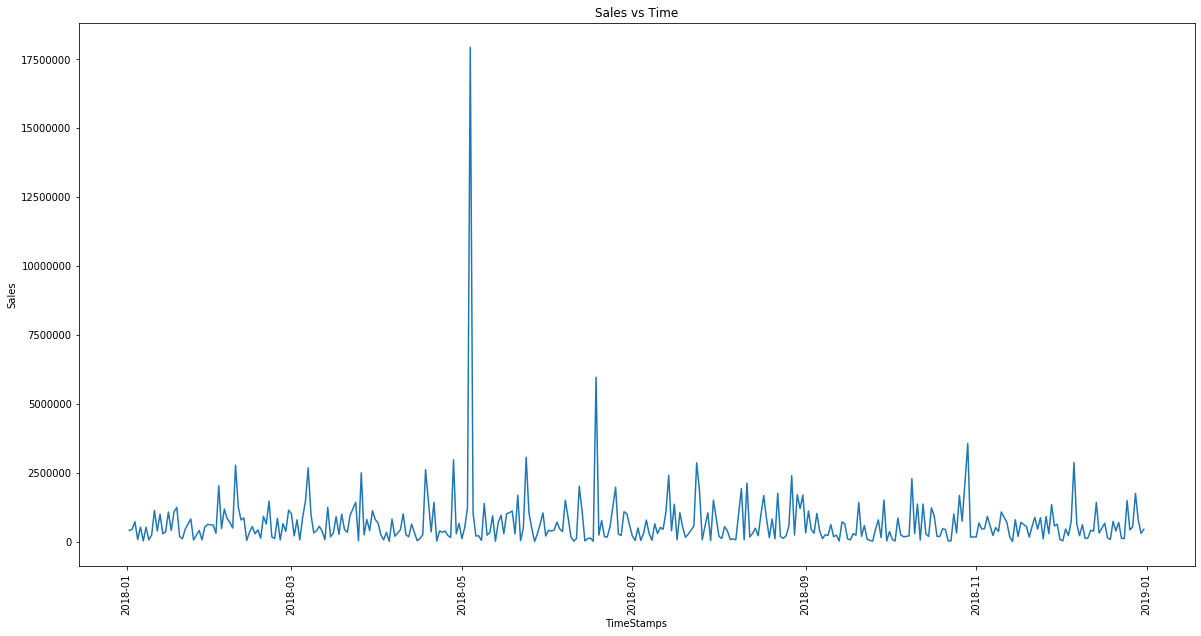

In [57]:
i=mask.groupby('InvoiceDate')['JwlCost'].sum()
plt.figure(figsize=(20,10))
plt.plot(i.index,i)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xticks(rotation=90)
plt.xlabel("TimeStamps")
plt.ylabel("Sales")
plt.title("Sales vs Time")
plt.show()

In 2018, we see a huge spike in the month of June, specifically the beginning of the month of June.

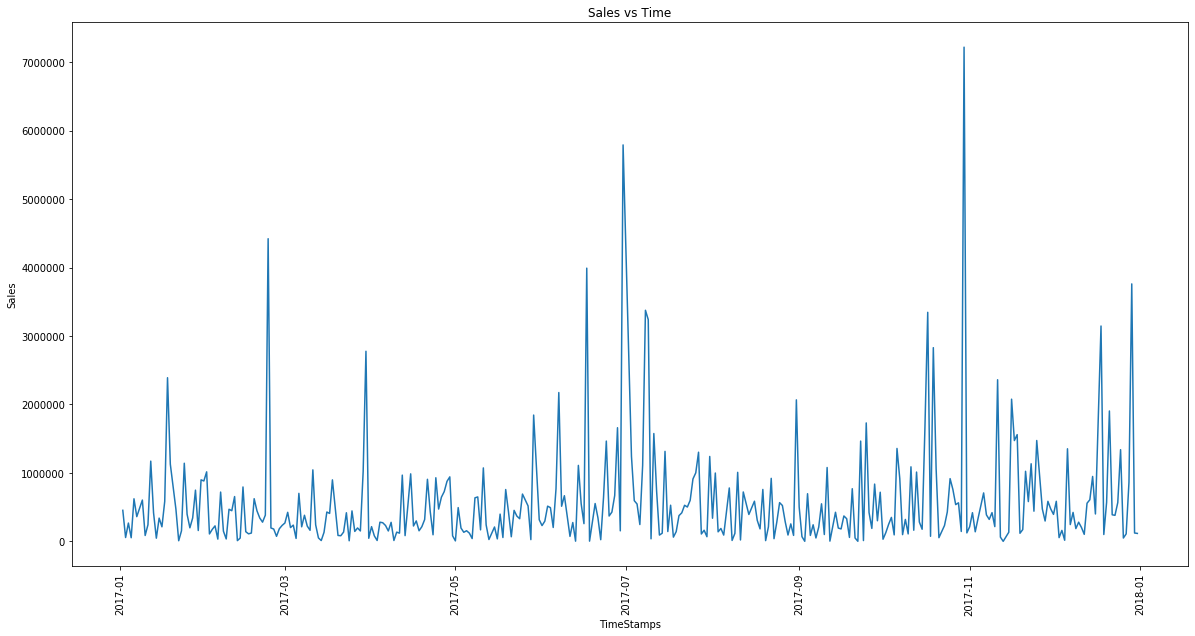

In [62]:
j=mask1.groupby('InvoiceDate')['JwlCost'].sum()
plt.figure(figsize=(20,10))
plt.plot(j.index,j)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xticks(rotation=90)
plt.xlabel("TimeStamps")
plt.ylabel("Sales")
plt.title("Sales vs Time")
plt.show()

2017 data is more streamlined in the sense that there are definite spikes in several months, such as end of February, June and July and November to December.

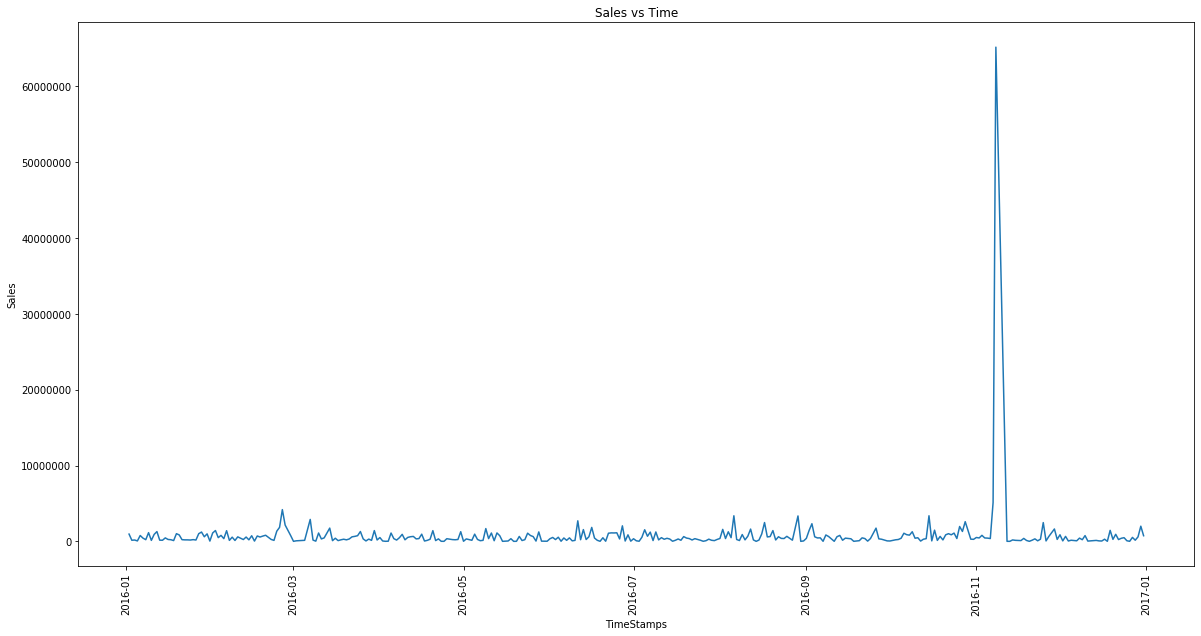

In [64]:
k=mask2.groupby('InvoiceDate')['JwlCost'].sum()
plt.figure(figsize=(20,10))
plt.plot(k.index,k)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xticks(rotation=90)
plt.xlabel("TimeStamps")
plt.ylabel("Sales")
plt.title("Sales vs Time")
plt.show()

In 2016 we see the unnatural spike in sales in the month of November due to demonitisation.

# Conclusions :-

### From the dataset some initial impressions we get, are:-
 
 1) The data is missing a lot of records on collection id, design id, subgroups and other things. A more detailed analysis would have been possible if these records were not missing.
 
 2) The data is from a jewellery store that mostly sells diamond and gold jewellery but also some silver jewellery along with them. This means the data has huge variations in price, quantity and other numeric fields. This tends to give us a lot of outliers and makes some visualisations impossible such as box plots. Also a general description gives us the mean, median min, max from which also we cannot say anything because of this huge variability.

### Insights gained from the analysis:-

 1) The above analysis gives us an idea of the most profitable groups, subgroups, collections and individual pieces of jewellery classified by metal type. This gives an overview that might be helpful for the shop in deciding what to manufacture moving forward so as to yield the maximum amount of profit. The lead time factor is also taken into account here, which gives us further insight as to what are the jewellery that gives us the maximum profit compared to the amount of days it takes for the said piece of jewellery to sell.
 
 2) An analysis of the dead stock is also done here, which gives us an insight into the groups, subgroups and individual pieces of jewellery that have been lying in stock for a long period of time. This might be helpful in deciding what are the items that are not worth manufacturing for the next season.
 
 3) From the analysis we can conclude that ordered items in general are very profitable to the store, so moving forward it might be a good idea to implement a recommendation system based on online ordering that helps customers pick and customise their jewellery. 